In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from math import sin, cos, sqrt, atan2, radians

%matplotlib inline

In [135]:
# Read housing data in.
kc_house_df = pd.read_csv("data/kc_house_data.csv")
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The yr_renovated column seems problematic, could be changed to a categorical column of a renovated yes or no. Also possible to look at columns of differences between yr_renovated and date or yr_built. 

#### Starting data

We'll start with a smaller set of data to get a feel for which features are initially important, and add in more as our models get more advanced.

In [136]:
stripped_down_df = kc_house_df.loc[:, ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']]
sns.pairplot(stripped_down_df); # Pairplot to check for good places to start analysis.

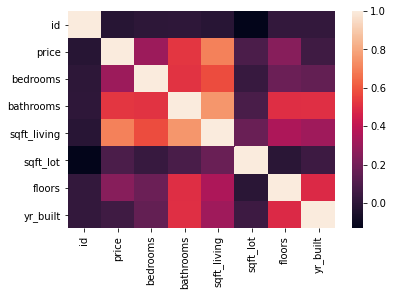

In [ ]:
sns.heatmap(stripped_down_df.corr());

## Starting Regressions

A few exploratory models to see what we have to work with.

### Simple Regression

Let's start by just using the `sqft_living` column, as that's the one with the highest correlation with price.

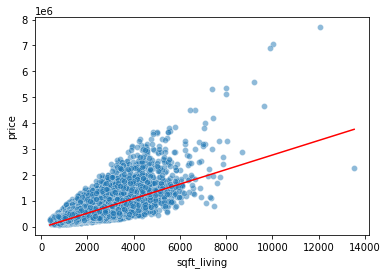

In [ ]:
# Get the specific column out we want for the regression
X = stripped_down_df.loc[:, ['sqft_living']]
y = stripped_down_df.loc[:, ['price']]
plot_data = stripped_down_df.loc[:, ['price', 'sqft_living']]


beginner_reg = LinearRegression()
beginner_reg.fit(X, y)
prediction = beginner_reg.predict(X)

# Plot regression line over scatter plot
fig, ax = plt.subplots()
sns.scatterplot(data=plot_data, x='sqft_living', y='price', ax=ax, alpha=0.5);
sns.lineplot(x=X['sqft_living'], y=prediction[:, 0], ax=ax, color='r');


In [ ]:
print(f"R Squared Score: {beginner_reg.score(X, y)}")

R Squared Score: 0.49268789904035093


In [ ]:
stats_models_version = sm.OLS(y['price'], sm.add_constant(X)).fit()
stats_models_version.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:48:34   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### A few more features

Next we can look at a model with more of our test features, though it's still a very basic version.

In [ ]:
inter_df = stripped_down_df.loc[:, ['sqft_living', 'bathrooms', 'bedrooms', 'sqft_lot', 'floors', 'yr_built', 'price']]
X_more = inter_df.drop('price', axis=1)
y_more = inter_df.price

inter_reg = LinearRegression()
inter_reg.fit(X_more, y_more)
print(f"R Squared Score: {inter_reg.score(X_more, y_more)}")
print(f"Coefficients: {inter_reg.coef_}")


R Squared Score: 0.5562851846502235
Coefficients: [ 3.03767349e+02  6.74690231e+04 -6.89999611e+04 -3.01545416e-01
  5.42136300e+04 -3.36761796e+03]


In [ ]:
stats_models_version_inter = sm.OLS(y_more, sm.add_constant(X_more)).fit()
stats_models_version_inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     4511.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:48:35   Log-Likelihood:            -2.9862e+05
No. Observations:               21597   AIC:                         5.972e+05
Df Residuals:                   21590   BIC:                         5.973e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.559e+06   1.35e+05     48.643      0.000     6.3e+06    6.82e+06
sqft_living   303.7673      3.000    101.249      0.000     297.887     309.648
bathrooms    6.747e+04   3851.524     17.517      0.000    5.99e+04     7.5e+04
bedrooms      -6.9e+04   2253.108    -30.624      0.000   -7.34e+04   -6.46e+04
sqft_lot       -0.3015      0.041     -7.329      0.000      -0.382      -0.221
floors       5.421e+04   3778.051     14.350      0.000    4.68e+04    6.16e+04
yr_built    -3367.6180     70.002    -48.107      0.000   -3504.828   -3230.408
==============================================================================
Omnibus:                    14312.566   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           522258.106
Skew:                           2.680   Prob(JB):                         0.00
Kurtosis:                      26.487   Cond. No.                     3.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Needs Improvement

So far both models have had signs of multicollinearity, which indicates more work will be needed to improve their use for inferential interpretation. Adding in more features did give a nice improvement to the R squared value, but it's still fairly low, and so we'll apply new techniques in order create predictive models.

## Train-Test Split Versions

We'll use train-test split in order to make models that can be used for predictions. This allows us to see how our model can perform on new data and whether we've accidentally over or under fit.

In [ ]:
# Split with random state for repeatability
X_train, X_test, y_train, y_test = train_test_split(kc_house_df.drop('price', axis=1), kc_house_df.price, test_size=0.3, random_state=1)

##### Simple Regression

Same as the first model, just with the split included.

In [ ]:
# Get the specific column out we want for the regression
X_simple_train = X_train.loc[:, ['sqft_living']]
y_simple_train = y_train


simple_split_reg = LinearRegression()
simple_split_reg.fit(X_simple_train, y_simple_train)
print(f"R Squared Score: {simple_split_reg.score(X_simple_train, y_simple_train)}")
print(f"Coefficients: {simple_split_reg.coef_}")

R Squared Score: 0.4875906720013805
Coefficients: [284.19711911]


##### Multiple Regression: numerical data

As above, this is the same as our second model, but with a predictive use.

In [ ]:
X_more_train = X_train.loc[:, ['sqft_living', 'bathrooms', 'bedrooms', 'sqft_lot', 'floors', 'yr_built']]

inter_train_reg = LinearRegression()
inter_train_reg.fit(X_more_train, y_train)
print(f"R Squared Score: {inter_train_reg.score(X_more_train, y_train)}")
print(f"Coefficients: {inter_train_reg.coef_}")

R Squared Score: 0.5531144672260686
Coefficients: [ 3.09252352e+02  6.78876981e+04 -7.09599994e+04 -3.03151078e-01
  5.39135851e+04 -3.43204783e+03]


##### Multiple Regression: categorical data cleaned and encoded.

Now we get more into a reasonable area for being able to provide value to our Realty company. We'll still start with our more restricted feature set, but the techniques we'll use to clean and transform the data will be extended to our more advanced models later.

In [ ]:
X_stripped_down_train = X_train.loc[:, ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']]
X_stripped_down_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15117 entries, 8093 to 235
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           15117 non-null  int64  
 1   bedrooms     15117 non-null  int64  
 2   bathrooms    15117 non-null  float64
 3   sqft_living  15117 non-null  int64  
 4   sqft_lot     15117 non-null  int64  
 5   floors       15117 non-null  float64
 6   waterfront   13442 non-null  object 
 7   condition    15117 non-null  object 
 8   grade        15117 non-null  object 
 9   yr_built     15117 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 1.3+ MB


Waterfront is the only feature missing values, we'll fill and encode the column so our model can use it.

In [ ]:
# fill nulls
water_imputer = SimpleImputer(strategy='most_frequent')
X_stripped_down_train['waterfront'] = water_imputer.fit_transform(X_stripped_down_train['waterfront'].values.reshape(-1,1))[:, 0]

##### Ordinal Encode

In [ ]:
water_front_vals = X_stripped_down_train[['waterfront']]
# separate encoder to be used to convert test data to usable form later
water_encoder = OrdinalEncoder()
# only fit on training data
water_encoder.fit(water_front_vals)
# transform and flatten training data
water_train_transform = water_encoder.transform(water_front_vals).flatten()
# replace original categorical with new boolean, integer data
X_stripped_down_train['waterfront'] = water_train_transform

##### One Hot Encode

Used for the columns with more than one category, we only have two features to transform this way for now.

Grade column:

In [ ]:
grade_train_vals = X_stripped_down_train[['grade']]
# grade encoder for later use, drops first column to avoid multicollinearity
grade_ohe = OneHotEncoder(categories='auto', sparse=False, drop='first')
grade_ohe.fit(grade_train_vals)
grade_train_encoded = grade_ohe.transform(grade_train_vals)
# get list of nicer column names
grade_categories = [f"Grade: {cat.split()[0]}" for cat in grade_ohe.categories_[0][1:]]
# convert to dataframe for ease of use
grade_train_encoded = pd.DataFrame(grade_train_encoded, columns=grade_categories, index=X_stripped_down_train.index)
# drop old column
X_stripped_down_train = X_stripped_down_train.drop("grade", axis=1)
# add in new columns
X_stripped_down_train = pd.concat([X_stripped_down_train, grade_train_encoded], axis=1)

Condition column:

In [ ]:
condition_train_vals = X_stripped_down_train[['condition']]
# exactly the same process as for the grade category
condition_ohe = OneHotEncoder(categories='auto', sparse=False, drop='first')
condition_ohe.fit(condition_train_vals)
condition_train_encoded = condition_ohe.transform(condition_train_vals)
condition_categories = [f"Condition: {cat}" for cat in condition_ohe.categories_[0][1:]]
# convert to dataframe for ease of use
condition_train_encoded = pd.DataFrame(condition_train_encoded, columns=condition_categories, index=X_stripped_down_train.index)
# drop old column
X_stripped_down_train = X_stripped_down_train.drop("condition", axis=1)
# add in new columns
X_stripped_down_train = pd.concat([X_stripped_down_train, condition_train_encoded], axis=1)

In [ ]:
X_stripped_down_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15117 entries, 8093 to 235
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15117 non-null  int64  
 1   bedrooms              15117 non-null  int64  
 2   bathrooms             15117 non-null  float64
 3   sqft_living           15117 non-null  int64  
 4   sqft_lot              15117 non-null  int64  
 5   floors                15117 non-null  float64
 6   waterfront            15117 non-null  float64
 7   yr_built              15117 non-null  int64  
 8   Grade: 11             15117 non-null  float64
 9   Grade: 12             15117 non-null  float64
 10  Grade: 13             15117 non-null  float64
 11  Grade: 3              15117 non-null  float64
 12  Grade: 4              15117 non-null  float64
 13  Grade: 5              15117 non-null  float64
 14  Grade: 6              15117 non-null  float64
 15  Grade: 7          

In [ ]:
cat_train_reg = LinearRegression()
cat_train_reg.fit(X_stripped_down_train, y_train)
print(f"R Squared Score: {cat_train_reg.score(X_stripped_down_train, y_train)}")
print(f"Coefficients: {cat_train_reg.coef_}")

R Squared Score: 0.6716469637540805
Coefficients: [-9.34831828e-07 -2.94287708e+04  5.57039035e+04  1.48185789e+02
 -2.30046150e-01  3.02907767e+04  7.58280753e+05 -3.52011485e+03
  2.61637058e+05  8.07828788e+05  2.04405252e+06 -5.73086514e+05
 -5.33374201e+05 -5.53982855e+05 -4.96624024e+05 -4.14948269e+05
 -3.21198495e+05 -1.72753920e+05 -3.14388214e+04  2.09110239e+04
 -4.28218048e+04  5.22301449e+04]


#### Winner: Multiple regression with categorical data

The last regression had the highest R squared score out of all, time to test it. We need to apply the same cleaning and feature cleanup to the test data first.

In [ ]:
# Begin transforming test data in the same way
X_stripped_down_test = X_test.loc[:, ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']]

In [ ]:
# fill nulls
X_stripped_down_test['waterfront'] = water_imputer.transform(X_stripped_down_test['waterfront'].values.reshape(-1,1))[:, 0]

##### Ordinal Encode

In [ ]:
water_front_test_vals = X_stripped_down_test[['waterfront']]
water_test_transform = water_encoder.transform(water_front_test_vals).flatten()
# replace original categorical with new boolean, integer data
X_stripped_down_test['waterfront'] = water_test_transform

##### One Hot Encode

In [ ]:
# Grade column

grade_test_vals = X_stripped_down_test[['grade']]
# grade encoder for later use, drops first column to avoid multicollinearity
grade_test_encoded = grade_ohe.transform(grade_test_vals)
# convert to dataframe for ease of use
grade_test_encoded = pd.DataFrame(grade_test_encoded, columns=grade_categories, index=X_stripped_down_test.index)
# drop old column
X_stripped_down_test = X_stripped_down_test.drop("grade", axis=1)
# add in new columns
X_stripped_down_test = pd.concat([X_stripped_down_test, grade_test_encoded], axis=1)

In [ ]:
# Condition column

condition_test_vals = X_stripped_down_test[['condition']]
# exactly the same process as for the grade category
condition_test_encoded = condition_ohe.transform(condition_test_vals)
# convert to dataframe for ease of use
condition_test_encoded = pd.DataFrame(condition_test_encoded, columns=condition_categories, index=X_stripped_down_test.index)
# drop old column
X_stripped_down_test = X_stripped_down_test.drop("condition", axis=1)
# add in new columns
X_stripped_down_test = pd.concat([X_stripped_down_test, condition_test_encoded], axis=1)

In [ ]:
X_stripped_down_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480 entries, 16729 to 20705
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6480 non-null   int64  
 1   bedrooms              6480 non-null   int64  
 2   bathrooms             6480 non-null   float64
 3   sqft_living           6480 non-null   int64  
 4   sqft_lot              6480 non-null   int64  
 5   floors                6480 non-null   float64
 6   waterfront            6480 non-null   float64
 7   yr_built              6480 non-null   int64  
 8   Grade: 11             6480 non-null   float64
 9   Grade: 12             6480 non-null   float64
 10  Grade: 13             6480 non-null   float64
 11  Grade: 3              6480 non-null   float64
 12  Grade: 4              6480 non-null   float64
 13  Grade: 5              6480 non-null   float64
 14  Grade: 6              6480 non-null   float64
 15  Grade: 7        

In [ ]:
# Score on our already trained model
print(f"R Squared, test: {cat_train_reg.score(X_stripped_down_test, y_test)}")
print(f"RSME, test: {mean_squared_error(y_test, cat_train_reg.predict(X_stripped_down_test), squared=False)}")

R Squared, test: 0.6744670127016534
RSME, test: 202256.21843060033


#### Looking at more of the dataset


In [ ]:
housing_df = pd.read_csv('data/kc_house_data.csv', index_col='id')

In [ ]:
housing_df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                             
7129300520  10/13/2014  221900.0         3       1.00         1180      5650   
6414100192   12/9/2014  538000.0         3       2.25         2570      7242   
5631500400   2/25/2015  180000.0         2       1.00          770     10000   
2487200875   12/9/2014  604000.0         4       3.00         1960      5000   
1954400510   2/18/2015  510000.0         3       2.00         1680      8080   

            floors waterfront  view  condition          grade  sqft_above  \
id                                                                          
7129300520     1.0        NaN  NONE    Average      7 Average        1180   
6414100192     2.0         NO  NONE    Average      7 Average        2170   
5631500400     1.0         NO  NONE    Average  6 Low Average         770   
2487200875     1.0         NO  NONE  Very Good      7 Average        1050   
1954400510     1.0         NO  NONE    Average         8 Good        1680   

           sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                            
7129300520           0.0      1955           0.0    98178  47.5112 -122.257   
6414100192         400.0      1951        1991.0    98125  47.7210 -122.319   
5631500400           0.0      1933           NaN    98028  47.7379 -122.233   
2487200875         910.0      1965           0.0    98136  47.5208 -122.393   
1954400510           0.0      1987           0.0    98074  47.6168 -122.045   

            sqft_living15  sqft_lot15  
id                                     
7129300520           1340        5650  
6414100192           1690        7639  
5631500400           2720        8062  
2487200875           1360        5000  
1954400510           1800        7503

There's at least one obviously errant data point wherein a certain house is purported to have 33 bedrooms. This is 3 times more than any other house in the dataset and the house's other features don't seem to be in line with this assertion, so we'll just fix that one data point (changing 33 to 3) before going further.

In [ ]:
housing_df['bedrooms'] = housing_df['bedrooms'].apply(lambda x: 3 if x == 33 else x)

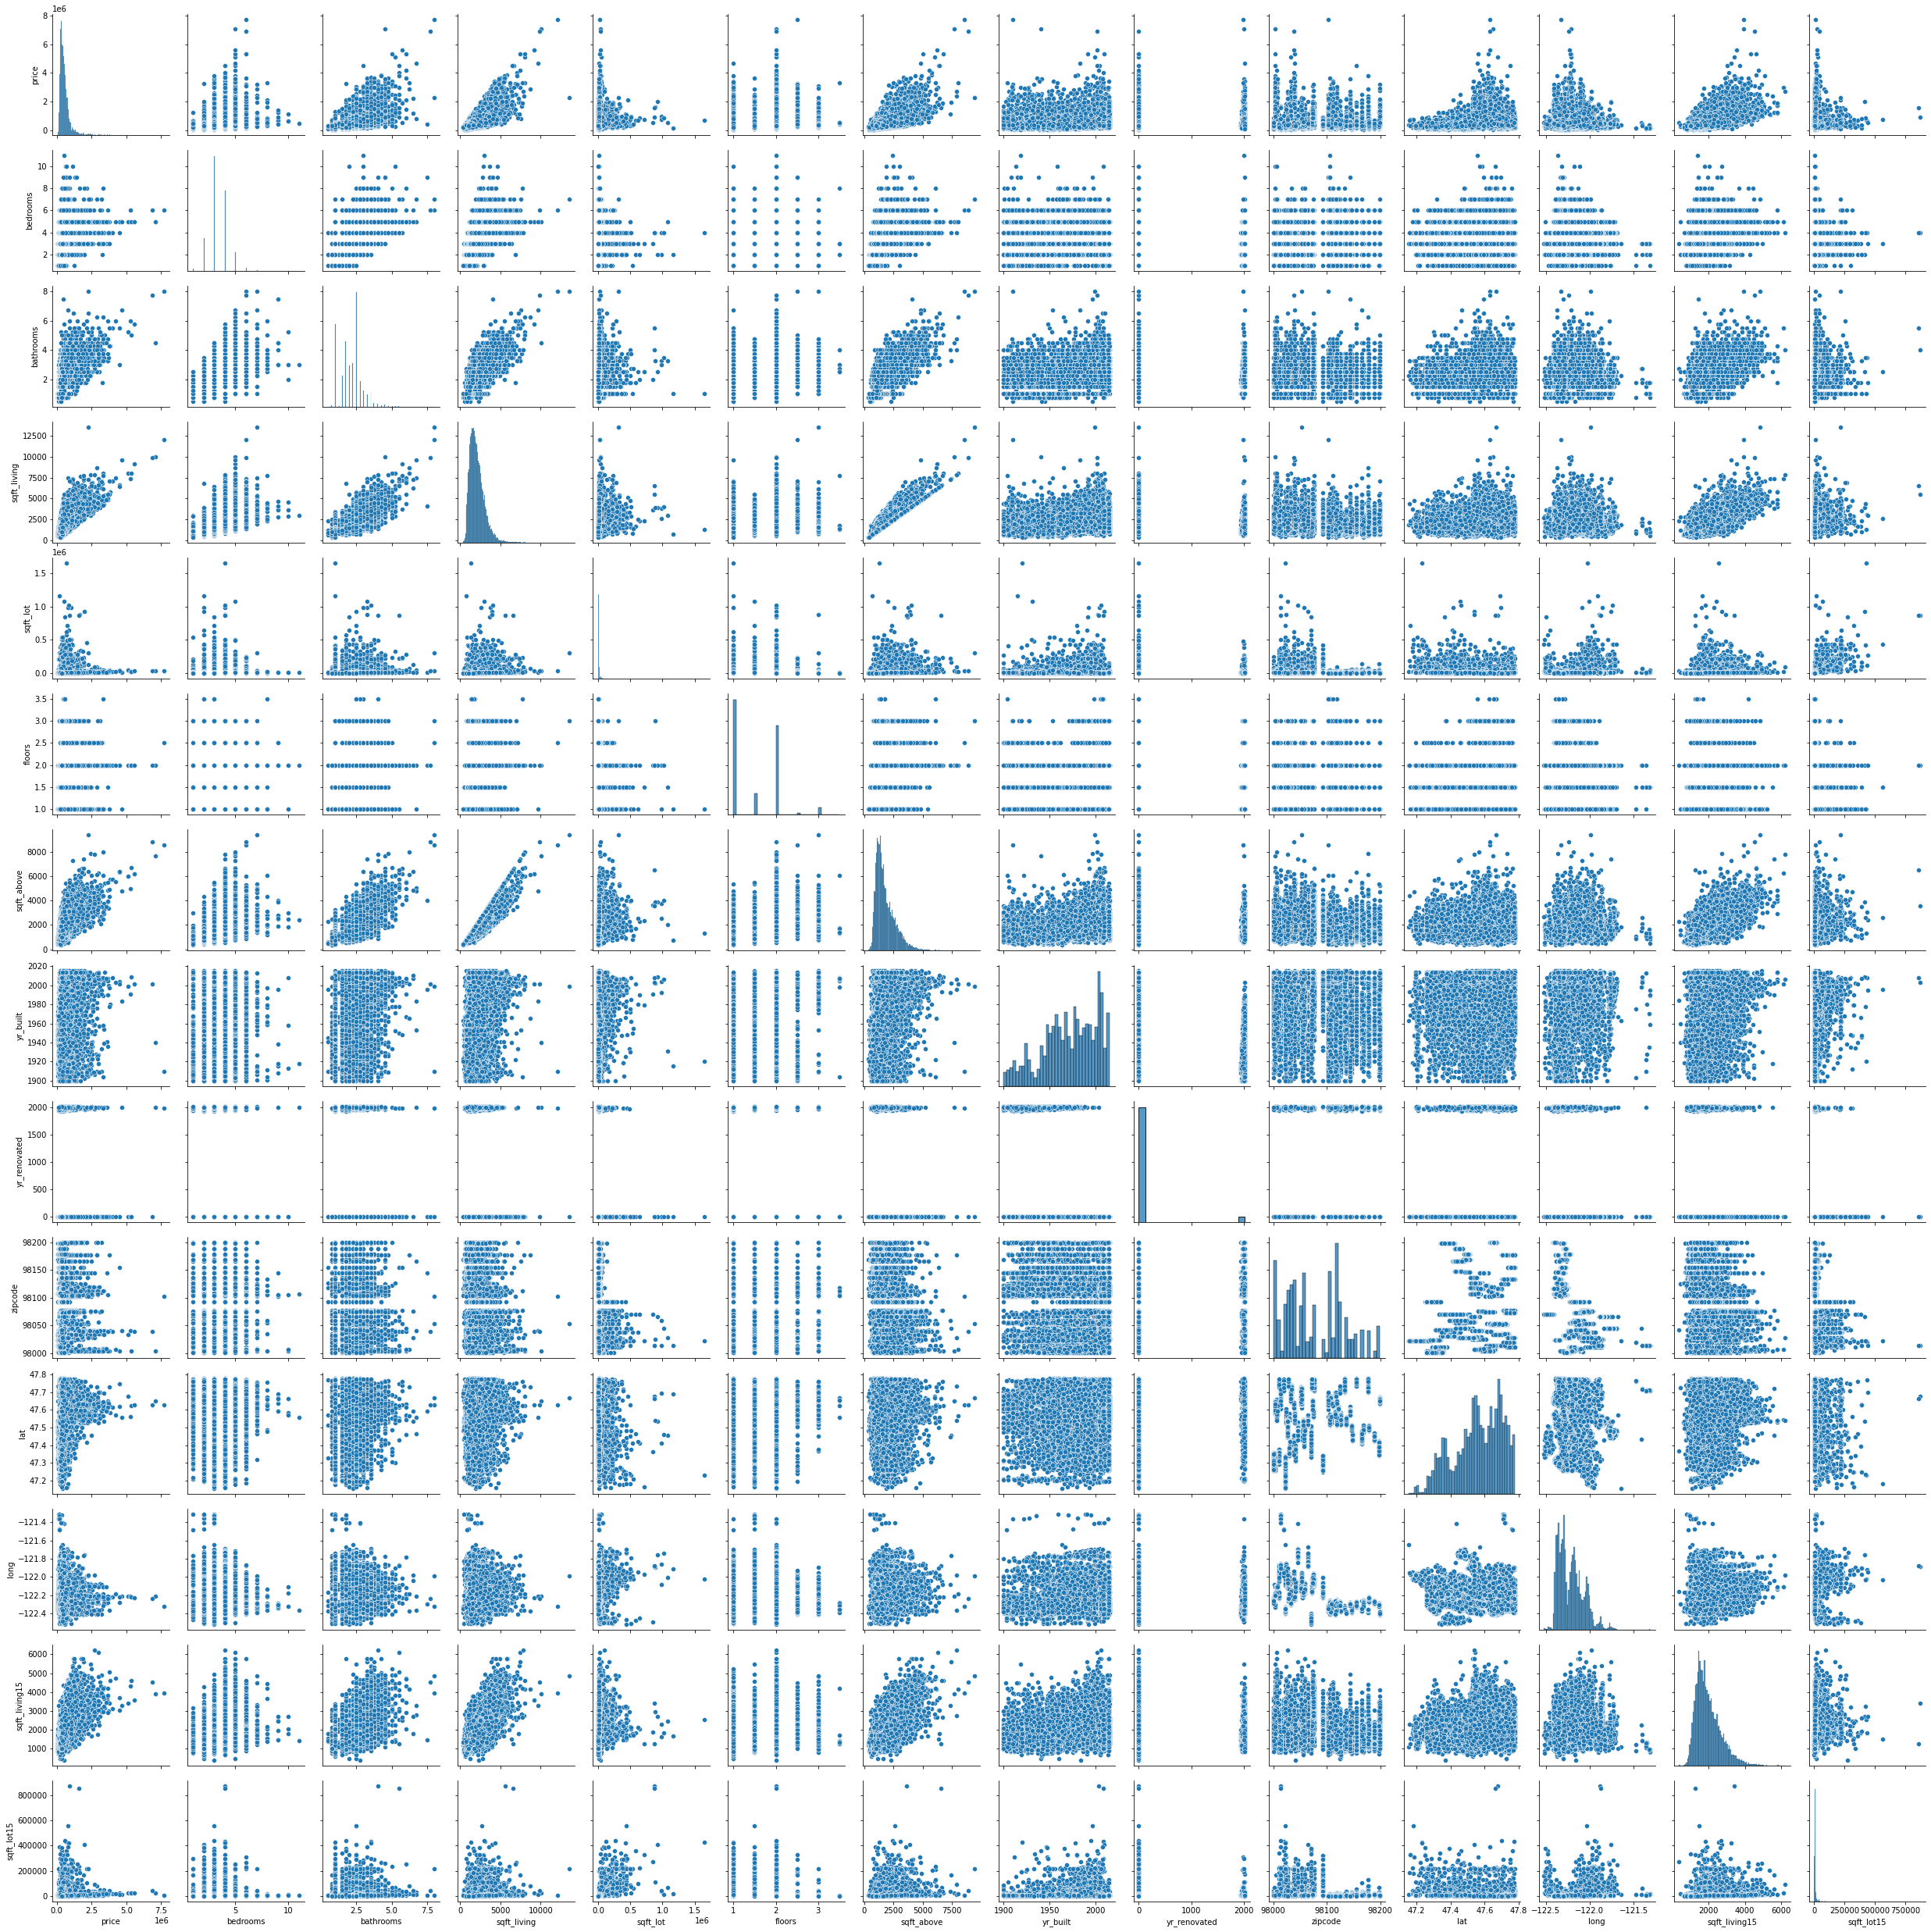

In [ ]:
sns.pairplot(housing_df);

### Making a Train-Test Split
Before we go any further with any cleaning or other types of adjustments, we'll make a train-test split for later model evaluation.

In [ ]:
X = housing_df.drop(['price'], axis=1)
y = housing_df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state=1)

From now on, any cleaning we do or models we build will use X_train and y_train instead of X and y.

### Filling in NaNs

Linear regression models will not run on dataframes which contain NaNs. These need to either be filled in with some sort of value or dropped. After looking at the proportions of missing data and in which columns they occur, we've decided to mostly replace NaNs with the mode of that column.

In [ ]:
X_train.isna().sum()

date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1898
view               45
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3095
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [ ]:
# To avoid SettingWithCopyWarning errors down the line, we'll set each dataframe equal to a copy of itself
X_train, X_test, y_train, y_test = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
def nan_filler(df_to_clean):
    
    """
    This function takes a dataframe with NaNs
    in the waterfront, view, and yr_renovated 
    columns and ?s in the sqft_basement column
    and replaces them with the mode of that
    column.
    """
    
    column_missing_values_dict = {'waterfront': np.NaN, 'view': np.NaN, 'sqft_basement': '?', 'yr_renovated': np.NaN}

    for column_name, missing_value in column_missing_values_dict.items():
        imputer = SimpleImputer(missing_values=missing_value, strategy='most_frequent')
        df_to_clean[column_name] = imputer.fit_transform(df_to_clean[column_name].values.reshape(-1,1))[:,0]

In [ ]:
nan_filler(X_train)
nan_filler(X_test)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17277 entries, 185000161 to 1762600320
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17277 non-null  object 
 1   bedrooms       17277 non-null  int64  
 2   bathrooms      17277 non-null  float64
 3   sqft_living    17277 non-null  int64  
 4   sqft_lot       17277 non-null  int64  
 5   floors         17277 non-null  float64
 6   waterfront     17277 non-null  object 
 7   view           17277 non-null  object 
 8   condition      17277 non-null  object 
 9   grade          17277 non-null  object 
 10  sqft_above     17277 non-null  int64  
 11  sqft_basement  17277 non-null  object 
 12  yr_built       17277 non-null  int64  
 13  yr_renovated   17277 non-null  float64
 14  zipcode        17277 non-null  int64  
 15  lat            17277 non-null  float64
 16  long           17277 non-null  float64
 17  sqft_living15  17277 non-null  int64 

### Fitting a model

Now we'll write a function to fit a linear regression and return several of it's metrics. We'll then fit a basic multiple linear regression to the data, dropping any columns that we have yet to convert to numerical data.

But first, we'll instantiate an empty dictionary to hold our test results. Normally we wouldn't score a model against the test data until the very end, but in this case, we'll hide these results from ourselves and only observe cross-validation results with each new model we train. We can then later examine all the test results of all of our different models, and examine their progress over time (or have a record of precisely where our modeling procedures have gone awry. 

In [ ]:
#models_dict = {}

models_dict = {'Naive simple': (0.49, 249000), 'All continuous': (0.61, 222000)}

In [ ]:
def model_fitter(X_mod, y_mod, X_test_mod, y_test_mod, model_name, drop_columns=None, sm_summary=False):
    
    """
    This function takes X and y training data and fits a 
    linear regression model to it. It will also score 
    this model against X and y test data and store the results 
    in a dictionary for later inspection. It will also optionally 
    display a statsmodels OLS summary for more detailed information 
    about the model.
    
    X_mod
    y_mod
    X_test_mod=None
    y_test_mod=None
    model_name=None (for results dictionary)
    drop_columns=None
    sm_summary=False
    """
    
    X_mod = X_mod.drop(drop_columns, axis=1).copy()
    X_test_mod = X_test_mod.drop(drop_columns, axis=1).copy()
    
    regression = LinearRegression()

    scores = cross_validate(
        estimator=regression,
        X=X_mod,
        y=y_mod,
        scoring=['neg_mean_squared_error', 'r2'],
        return_train_score=True,
        cv=None
    )

    print("Current Model")
    print("Train RMSE:      ", int(round(np.sqrt(scores["train_neg_mean_squared_error"]*-1).mean())))
    print("Train R^2:       ", round(scores["train_r2"].mean(), 3))
    print("Validation RMSE: ", int(round(np.sqrt(scores["test_neg_mean_squared_error"]*-1).mean())))
    print("Validation R^2:  ", round(scores["test_r2"].mean(), 3))
    
    regression = LinearRegression()
    regression.fit(X_mod, y_mod)
    
    y_hat = regression.predict(X_test_mod)
    rmse = np.sqrt(mean_squared_error(y_test_mod, y_hat))
    
    models_dict.update({model_name: (round(regression.score(X_test_mod, y_test_mod), 3), int(round((round(rmse / 1000)*1000))))})
    
    if sm_summary:
        return sm.OLS(y_train, sm.add_constant(X_mod)).fit().summary()

In [ ]:
columns_to_drop = ['date', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement']
model_fitter(X_train, 
             y_train, 
             X_test, 
             y_test, 
             'All numeric', 
             drop_columns=columns_to_drop, 
             sm_summary=True
             )

Current Model
Train RMSE:       225510
Train R^2:        0.627
Validation RMSE:  225891
Validation R^2:   0.625


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     2235.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:50:24   Log-Likelihood:            -2.3748e+05
No. Observations:               17277   AIC:                         4.750e+05
Df Residuals:                   17263   BIC:                         4.751e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.07e+07   3.59e+06     -2.985      0.003   -1.77e+07   -3.67e+06
bedrooms      -6.508e+04   2446.118    -26.606      0.000   -6.99e+04   -6.03e+04
bathrooms      5.888e+04   4058.132     14.510      0.000    5.09e+04    6.68e+04
sqft_living     232.3347      5.330     43.586      0.000     221.886     242.783
sqft_lot          0.1730      0.059      2.938      0.003       0.058       0.288
floors         2.468e+04   4488.482      5.498      0.000    1.59e+04    3.35e+04
sqft_above       34.0002      5.345      6.362      0.000      23.524      44.476
yr_built      -2498.2269     82.979    -30.107      0.000   -2660.875   -2335.579
yr_renovated     34.7034      4.926      7.045      0.000      25.049      44.358
zipcode        -589.8496     40.742    -14.478      0.000    -669.707    -509.992
lat            6.227e+05   1.32e+04     47.352      0.000    5.97e+05    6.48e+05
long           -3.58e+05   1.63e+04    -21.935      0.000    -3.9e+05   -3.26e+05
sqft_living15    81.5261      4.071     20.024      0.000      73.546      89.506
sqft_lot15       -0.4269      0.089     -4.812      0.000      -0.601      -0.253
==============================================================================
Omnibus:                    14170.132   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1008941.718
Skew:                           3.476   Prob(JB):                         0.00
Kurtosis:                      39.786   Cond. No.                     2.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Cleaning up important columns

The waterfront, view, condition, and grade columns should all be numeric. We'll clean those up with a few assorted in-place adjustments.

In [ ]:
X_train['grade'].value_counts()

7 Average        7145
8 Good           4850
9 Better         2101
6 Low Average    1632
10 Very Good      924
11 Excellent      322
5 Fair            202
12 Luxury          67
4 Low              21
13 Mansion         12
3 Poor              1
Name: grade, dtype: int64

In [ ]:
X_train.loc[:,'grade'] = X_train.copy().loc[:,'grade'].apply(lambda x: int(x[0]))
X_test.loc[:,'grade'] = X_test.copy().loc[:,'grade'].apply(lambda x: int(x[0]))
X_train['grade'].value_counts()

7    7145
8    4850
9    2101
6    1632
1    1325
5     202
4      21
3       1
Name: grade, dtype: int64

In [ ]:
print(X_train['view'].value_counts())
print(X_train['condition'].value_counts())
print(X_train['waterfront'].value_counts())

NONE         15555
AVERAGE        783
GOOD           410
FAIR           279
EXCELLENT      250
Name: view, dtype: int64
Average      11206
Good          4542
Very Good     1378
Fair           130
Poor            21
Name: condition, dtype: int64
NO     17160
YES      117
Name: waterfront, dtype: int64


We'll write a quick label encoding function. There is a method to do this automatically, but we would like to keep the categories in a specific order, whereas the automatic label encoder would not produce our desired ordering. 

In [ ]:
def label_encode(df):
    
    """
    This function takes a data and label encodes some of the
    categorical variables.
    """

    view_values = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
    condition_values = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
    waterfront_values = ['NO', 'YES']

    values_dict = {'view': view_values, 'condition': condition_values, 'waterfront': waterfront_values}

    for column_name, values_list in values_dict.items():    
        for num, value in enumerate(values_list):
            df.loc[df[column_name] == value, column_name] = int(num)
        df[column_name] = df[column_name].astype(int)

In [ ]:
label_encode(X_train)
label_encode(X_test)

In [ ]:
X_train.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                           
185000161   10/15/2014         3       1.00         1780      7800     1.0   
2767601311  10/24/2014         3       2.50         1260      1102     3.0   
7131300063   4/29/2015         4       1.75         2140      4959     1.0   
8910500226    4/9/2015         3       3.50         1340      1168     2.0   
5230300210  12/10/2014         3       1.00         1040      9514     1.0   

            waterfront  view  condition  grade  sqft_above sqft_basement  \
id                                                                         
185000161            0     0          2      7        1060         720.0   
2767601311           0     0          2      8        1260           0.0   
7131300063           0     0          2      7        1080        1060.0   
8910500226           0     2          2      8        1080         260.0   
5230300210           0     0          3      7        1040           0.0   

            yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
id                                                                             
185000161       1957           0.0    98178  47.4932 -122.263           1450   
2767601311      2007           0.0    98107  47.6750 -122.387           1320   
7131300063      1965           0.0    98118  47.5166 -122.266           1590   
8910500226      2002           0.0    98133  47.7110 -122.356           1650   
5230300210      1969           0.0    98059  47.4936 -122.102           1040   

            sqft_lot15  
id                      
185000161         7800  
2767601311        2500  
7131300063        5250  
8910500226        1378  
5230300210        9514

We'll also convert the date column to pandas datetime values and the sqft_basement and grade columns into numeric columns.

In [ ]:
X_train.loc[:, 'date'] = pd.to_datetime(X_train.loc[:, 'date'])
X_test.loc[:, 'date'] = pd.to_datetime(X_test.loc[:, 'date'])
X_train.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                          
185000161  2014-10-15         3       1.00         1780      7800     1.0   
2767601311 2014-10-24         3       2.50         1260      1102     3.0   
7131300063 2015-04-29         4       1.75         2140      4959     1.0   
8910500226 2015-04-09         3       3.50         1340      1168     2.0   
5230300210 2014-12-10         3       1.00         1040      9514     1.0   

            waterfront  view  condition  grade  sqft_above sqft_basement  \
id                                                                         
185000161            0     0          2      7        1060         720.0   
2767601311           0     0          2      8        1260           0.0   
7131300063           0     0          2      7        1080        1060.0   
8910500226           0     2          2      8        1080         260.0   
5230300210           0     0          3      7        1040           0.0   

            yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
id                                                                             
185000161       1957           0.0    98178  47.4932 -122.263           1450   
2767601311      2007           0.0    98107  47.6750 -122.387           1320   
7131300063      1965           0.0    98118  47.5166 -122.266           1590   
8910500226      2002           0.0    98133  47.7110 -122.356           1650   
5230300210      1969           0.0    98059  47.4936 -122.102           1040   

            sqft_lot15  
id                      
185000161         7800  
2767601311        2500  
7131300063        5250  
8910500226        1378  
5230300210        9514

In [ ]:
X_train['sqft_basement'] = X_train['sqft_basement'].astype(float)
X_train['grade'] = X_train['grade'].astype(int)

X_test['sqft_basement'] = X_test['sqft_basement'].astype(float)
X_test['grade'] = X_test['grade'].astype(int)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17277 entries, 185000161 to 1762600320
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           17277 non-null  datetime64[ns]
 1   bedrooms       17277 non-null  int64         
 2   bathrooms      17277 non-null  float64       
 3   sqft_living    17277 non-null  int64         
 4   sqft_lot       17277 non-null  int64         
 5   floors         17277 non-null  float64       
 6   waterfront     17277 non-null  int64         
 7   view           17277 non-null  int64         
 8   condition      17277 non-null  int64         
 9   grade          17277 non-null  int64         
 10  sqft_above     17277 non-null  int64         
 11  sqft_basement  17277 non-null  float64       
 12  yr_built       17277 non-null  int64         
 13  yr_renovated   17277 non-null  float64       
 14  zipcode        17277 non-null  int64         
 15  lat   

### Now we'll train a model using all the columns, except for date.

In [ ]:
columns_to_drop = ['date']
model_fitter(X_train, 
             y_train, 
             X_test, 
             y_test, 
             'All original features', 
             drop_columns=columns_to_drop, 
             sm_summary=True
             )

Current Model
Train RMSE:       207856
Train R^2:        0.683
Validation RMSE:  208408
Validation R^2:   0.68


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     2068.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:50:26   Log-Likelihood:            -2.3607e+05
No. Observations:               17277   AIC:                         4.722e+05
Df Residuals:                   17258   BIC:                         4.723e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.364e+06   3.37e+06     -0.405      0.685   -7.96e+06    5.24e+06
bedrooms      -4.439e+04   2299.013    -19.306      0.000   -4.89e+04   -3.99e+04
bathrooms      5.287e+04   3750.408     14.098      0.000    4.55e+04    6.02e+04
sqft_living     146.0670     22.516      6.487      0.000     101.934     190.200
sqft_lot          0.1260      0.054      2.318      0.020       0.019       0.233
floors         3.232e+04   4170.916      7.750      0.000    2.41e+04    4.05e+04
waterfront     6.024e+05   2.09e+04     28.812      0.000    5.61e+05    6.43e+05
view           5.936e+04   2430.499     24.425      0.000    5.46e+04    6.41e+04
condition      3.158e+04   2710.764     11.649      0.000    2.63e+04    3.69e+04
grade         -2.229e+04    893.313    -24.950      0.000    -2.4e+04   -2.05e+04
sqft_above       84.8629     22.450      3.780      0.000      40.859     128.867
sqft_basement    41.7527     22.293      1.873      0.061      -1.945      85.450
yr_built      -1754.2940     81.478    -21.531      0.000   -1914.000   -1594.588
yr_renovated     36.7210      4.612      7.963      0.000      27.682      45.760
zipcode        -660.7730     37.952    -17.411      0.000    -735.164    -586.382
lat            6.774e+05   1.22e+04     55.566      0.000    6.54e+05    7.01e+05
long          -3.062e+05   1.51e+04    -20.292      0.000   -3.36e+05   -2.77e+05
sqft_living15    58.6668      3.827     15.328      0.000      51.165      66.169
sqft_lot15       -0.4814      0.082     -5.883      0.000      -0.642      -0.321
==============================================================================
Omnibus:                    13438.452   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1076477.788
Skew:                           3.143   Prob(JB):                         0.00
Kurtosis:                      41.156   Cond. No.                     2.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Implementing dummy variables

In [ ]:
grade_dummies = pd.get_dummies(X_train['grade'], prefix='grd', drop_first=True)
view_dummies = pd.get_dummies(X_train['view'], prefix='view', drop_first=True)
condition_dummies = pd.get_dummies(X_train['condition'], prefix='cond', drop_first=True)
waterfront_dummies = pd.get_dummies(X_train['waterfront'], prefix='wtrfrnt', drop_first=True)

X_train_dummies = X_train.drop(['grade', 'view', 'condition', 'waterfront'], axis=1)
X_train_dummies = pd.concat([X_train_dummies, grade_dummies, view_dummies, condition_dummies, waterfront_dummies], axis=1)

grade_dummies = pd.get_dummies(X_test['grade'], prefix='grd', drop_first=True)
view_dummies = pd.get_dummies(X_test['view'], prefix='view', drop_first=True)
condition_dummies = pd.get_dummies(X_test['condition'], prefix='cond', drop_first=True)
waterfront_dummies = pd.get_dummies(X_test['waterfront'], prefix='wtrfrnt', drop_first=True)

X_test = X_test.drop(['grade', 'view', 'condition', 'waterfront'], axis=1)
X_test = pd.concat([X_test, grade_dummies, view_dummies, condition_dummies, waterfront_dummies], axis=1)

X_test.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id                                                                          
8562000010 2015-05-01         3       1.75         1210      8864     1.0   
4363700200 2015-03-25         4       1.00         1190      7920     1.0   
8165501620 2014-12-18         2       2.25         1550      1824     2.0   
8718500075 2014-11-17         3       1.50         1300      8280     1.0   
6154900005 2014-09-24         4       2.75         2420      7102     1.0   

            sqft_above  sqft_basement  yr_built  yr_renovated  ...  grd_9  \
id                                                             ...          
8562000010        1210            0.0      1985           0.0  ...      0   
4363700200         890          300.0      1951           0.0  ...      0   
8165501620        1550            0.0      2007           0.0  ...      0   
8718500075        1300            0.0      1956           0.0  ...      0   
6154900005        1670          750.0      1946           0.0  ...      0   

            view_1  view_2  view_3  view_4  cond_1  cond_2  cond_3  cond_4  \
id                                                                           
8562000010       0       0       0       0       0       1       0       0   
4363700200       0       0       0       0       0       1       0       0   
8165501620       0       0       0       0       0       1       0       0   
8718500075       0       0       0       0       0       0       0       1   
6154900005       0       0       0       0       0       0       0       1   

            wtrfrnt_1  
id                     
8562000010          0  
4363700200          0  
8165501620          0  
8718500075          0  
6154900005          0  

[5 rows x 30 columns]

In [ ]:
set(X_train_dummies.columns) - set(X_test.columns)

{'grd_3'}

In [ ]:
missing_columns = set(X_train_dummies.columns) - set(X_test.columns)

for column in missing_columns:
    X_test[column] = 0

In [ ]:
columns_to_drop = ['date']
model_fitter(X_train_dummies, 
             y_train, 
             X_test, 
             y_test, 
             'Added dummies', 
             drop_columns=columns_to_drop, 
             sm_summary=False
             )

Current Model
Train RMSE:       202193
Train R^2:        0.7
Validation RMSE:  203015
Validation R^2:   0.697


### Feature Engineering

Here we'll engineer a few features to see if that improves our model's score at all. We'll start with distance to Seattle and distance to Redmond.

In [ ]:
def get_distance(point1, point2):
    R = 6370
    lat1 = radians(point1[0])
    lon1 = radians(point1[1])
    lat2 = radians(point2[0])
    lon2 = radians(point2[1])

    dlon = lon2 - lon1
    dlat = lat2- lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

# We will use the coordinates of the city halls of Seattle: (47.60457618602064, -122.32993003068658),
# and Redmond: (47.679328831807894, -122.13055895937767)
# For each record, we will calculate the distance from those points of interests and place them in a new column

X_train_features = X_train_dummies.copy()
X_train_features['lat_long'] = list(zip(X_train_features['lat'], X_train_features['long']))
X_train_features['Seattle_dist_km'] = X_train_features['lat_long'].apply(lambda x: get_distance(x, (47.60457618602064, -122.32993003068658)))
X_train_features['Redmond_dist_km'] = X_train_features['lat_long'].apply(lambda x: get_distance(x, (47.679328831807894, -122.13055895937767)))

X_train_features.drop('lat_long', axis=1, inplace=True)

X_test['lat_long'] = list(zip(X_test['lat'], X_test['long']))
X_test['Seattle_dist_km'] = X_test['lat_long'].apply(lambda x: get_distance(x, (47.60457618602064, -122.32993003068658)))
X_test['Redmond_dist_km'] = X_test['lat_long'].apply(lambda x: get_distance(x, (47.679328831807894, -122.13055895937767)))

X_test.drop('lat_long', axis=1, inplace=True)

In [ ]:
columns_to_drop = ['date']
model_fitter(X_train_features, 
             y_train, 
             X_test, 
             y_test, 
             'Engineered city-centers feature', 
             drop_columns=columns_to_drop, 
             sm_summary=False
             )

Current Model
Train RMSE:       190613
Train R^2:        0.734
Validation RMSE:  191295
Validation R^2:   0.731


### It only gets worse from here...

It looks as though each additional technique we apply to our models doesn't seem to offer any benefits and in fact increases our error.

In [ ]:
X_train_features2 = X_train_features
X_test_mock = X_test

# We can also include another feature: "average room size"
X_train_features2['average_room_size'] = X_train_features2['sqft_living'] / (X_train['bathrooms'] + X_train['bedrooms'])
X_test['average_room_size'] = X_test['sqft_living'] / (X_test_mock['bathrooms'] + X_test_mock['bedrooms'])

# Another useful metric could be the Floor Area Ratio
X_train_features2['floor_area_ratio'] = X_train_features2['sqft_living'] / X_train_features2['sqft_lot']
X_test['floor_area_ratio'] = X_test['sqft_living'] / X_test['sqft_lot']

In [ ]:
columns_to_drop = ['date']
model_fitter(X_train_features2, 
             y_train, 
             X_test, 
             y_test, 
             'More features engineered', 
             drop_columns=columns_to_drop, 
             sm_summary=False
             )

Current Model
Train RMSE:       185598
Train R^2:        0.748
Validation RMSE:  187096
Validation R^2:   0.742


### Log Transformations

We'll try a few log transformations in order to normalize some of our data. We can't log transform any categorical variables because they're all in one-hot encoding, but the other continuous variables are worth examining.

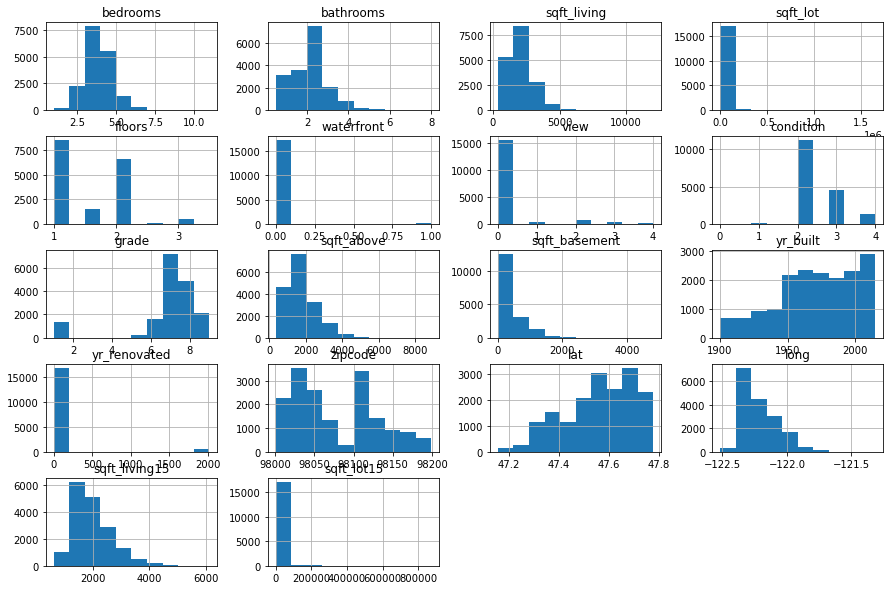

In [ ]:
X_train.hist(figsize=(15,10));

In [ ]:
X_train_log = X_train_features2

non_normal = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']

for feat in non_normal:
    X_train_log[f'log{feat}'] = X_train_log[feat].map(lambda x: np.log(x))
    
for feat in non_normal:
    X_test[f'log{feat}'] = X_test[feat].map(lambda x: np.log(x))

In [ ]:
columns_to_drop = ['date']
model_fitter(X_train_log, 
             y_train, 
             X_test, 
             y_test, 
             'Log transformations', 
             drop_columns=columns_to_drop, 
             sm_summary=True
             )

Current Model
Train RMSE:       183639
Train R^2:        0.753
Validation RMSE:  185305
Validation R^2:   0.747


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     1343.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:50:37   Log-Likelihood:            -2.3394e+05
No. Observations:               17277   AIC:                         4.680e+05
Df Residuals:                   17237   BIC:                         4.683e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.219e+08   4.24e+06     28.784      0.000    1.14e+08     1.3e+08
bedrooms           -6.23e+04   5389.514    -11.560      0.000   -7.29e+04   -5.17e+04
bathrooms          -901.1534   5963.415     -0.151      0.880   -1.26e+04    1.08e+04
sqft_living         402.8849     22.886     17.604      0.000     358.026     447.744
sqft_lot              0.0651      0.061      1.065      0.287      -0.055       0.185
floors             -1.71e+04   4525.746     -3.779      0.000    -2.6e+04   -8231.840
sqft_above           34.9260     22.644      1.542      0.123      -9.458      79.310
sqft_basement        30.6745     19.741      1.554      0.120      -8.019      69.368
yr_built          -1386.1013     81.378    -17.033      0.000   -1545.610   -1226.593
yr_renovated         36.3201      4.109      8.840      0.000      28.267      44.373
zipcode            -984.8370     37.725    -26.106      0.000   -1058.782    -910.892
lat                5.876e+05   2.89e+04     20.352      0.000    5.31e+05    6.44e+05
long               3.949e+05   2.31e+04     17.061      0.000     3.5e+05     4.4e+05
sqft_living15         6.9594     12.158      0.572      0.567     -16.871      30.789
sqft_lot15           -0.2456      0.095     -2.573      0.010      -0.433      -0.058
grd_3             -2.129e+05   1.85e+05     -1.152      0.250   -5.75e+05     1.5e+05
grd_4              -4.91e+05   4.22e+04    -11.641      0.000   -5.74e+05   -4.08e+05
grd_5             -4.016e+05   1.67e+04    -24.026      0.000   -4.34e+05   -3.69e+05
grd_6             -3.384e+05   1.06e+04    -31.991      0.000   -3.59e+05   -3.18e+05
grd_7             -2.596e+05   8769.555    -29.598      0.000   -2.77e+05   -2.42e+05
grd_8              -2.14e+05   7949.423    -26.920      0.000    -2.3e+05   -1.98e+05
grd_9             -1.446e+05   7373.804    -19.613      0.000   -1.59e+05    -1.3e+05
view_1             1.048e+05   1.13e+04      9.259      0.000    8.26e+04    1.27e+05
view_2              6.73e+04   7006.381      9.605      0.000    5.36e+04     8.1e+04
view_3             1.273e+05   9682.281     13.145      0.000    1.08e+05    1.46e+05
view_4             3.118e+05   1.45e+04     21.524      0.000    2.83e+05     3.4e+05
cond_1             8.019e+04   4.36e+04      1.839      0.066   -5294.965    1.66e+05
cond_2              9.94e+04   4.07e+04      2.440      0.015    1.95e+04    1.79e+05
cond_3             1.362e+05   4.08e+04      3.341      0.001    5.63e+04    2.16e+05
cond_4             1.701e+05    4.1e+04      4.151      0.000    8.98e+04     2.5e+05
wtrfrnt_1          5.574e+05   2.07e+04     26.930      0.000    5.17e+05    5.98e+05
Seattle_dist_km   -1.587e+04    463.623    -34.239      0.000   -1.68e+04    -1.5e+04
Redmond_dist_km    7076.9482    515.662     13.724      0.000    6066.199

In [ ]:
columns_to_drop = ['date', 'bathrooms', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'logsqft_lot15']
model_fitter(X_train_log, 
             y_train, 
             X_test, 
             y_test, 
             'Dropping columns', 
             drop_columns=columns_to_drop, 
             sm_summary=False
             )

Current Model
Train RMSE:       183689
Train R^2:        0.753
Validation RMSE:  185089
Validation R^2:   0.747


### Examining our test scores

In [ ]:
models_dict

{'Naive simple': (0.49, 249000),
 'All continuous': (0.61, 222000),
 'All numeric': (0.637, 216000),
 'All original features': (0.694, 198000),
 'Added dummies': (0.659, 210000),
 'Engineered city-centers feature': (0.696, 198000),
 'More features engineered': (0.681, 202000),
 'Log transformations': (0.66, 209000),
 'Dropping columns': (0.66, 209000)}

### More Feature Engineering and in Depth Modelling

In [ ]:
orig_data = pd.read_csv('data/kc_house_data.csv')

# Firstly, we check that all of the columns to check their data types.
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [ ]:
orig_data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [ ]:
# We should state our target variable.
y = orig_data['price']

# Of the remaining columns, all could act as features except for the id column. So this should be dropped.
feature_df = orig_data.drop(['id', 'price'], axis=1)

## Holdout test

In [ ]:
# We have now established our target and feature variables.
# Before any cleaning is done, we shall split our data into test and train.
X_train, X_test, y_train, y_test = train_test_split(
                                                    feature_df,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1
)

In [ ]:
# From now on we'll be working mainly with X_train

# From the column_names.md, we can see that these features would be our categorical variables
cat_X = ['date','bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']

# We'll isolate the categorical variables
cat_df = X_train[cat_X]

# We can drop those from the feature_df dataframe so we can have only continuous variables
continuous_X = X_train.drop(cat_X, axis=1)


## Data Cleaning
Now we have a better idea of the data that we are dealing with, we should start cleaning it in preparation for our model.

In [ ]:
# Let's have a look at the column values again in our continuous and categorical variables
continuous_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15117 entries, 8093 to 235
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_living    15117 non-null  int64  
 1   sqft_lot       15117 non-null  int64  
 2   sqft_above     15117 non-null  int64  
 3   sqft_basement  15117 non-null  object 
 4   lat            15117 non-null  float64
 5   long           15117 non-null  float64
 6   sqft_living15  15117 non-null  int64  
 7   sqft_lot15     15117 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.0+ MB


In [ ]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15117 entries, 8093 to 235
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          15117 non-null  object 
 1   bedrooms      15117 non-null  int64  
 2   bathrooms     15117 non-null  float64
 3   floors        15117 non-null  float64
 4   waterfront    13442 non-null  object 
 5   view          15079 non-null  object 
 6   condition     15117 non-null  object 
 7   grade         15117 non-null  object 
 8   yr_built      15117 non-null  int64  
 9   yr_renovated  12423 non-null  float64
 10  zipcode       15117 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.4+ MB


In [ ]:
# Interestingly, sqft_basement is registered as an object when it should be numerical
continuous_X['sqft_basement'].value_counts()

0.0       8948
?          329
600.0      153
700.0      150
500.0      146
          ... 
2330.0       1
1135.0       1
861.0        1
666.0        1
1630.0       1
Name: sqft_basement, Length: 276, dtype: int64

When we run the value_counts we see that there is a "?" which has 454 counts. Evidently an NaN value.

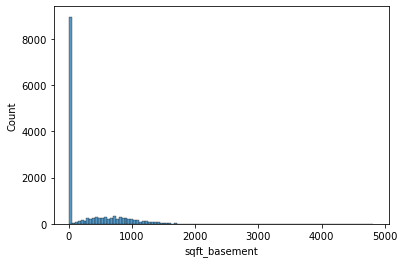

In [ ]:
# We'll make a histogram to look at the distributions of the data in this column
sns.histplot(continuous_X.loc[continuous_X['sqft_basement'] != '?']['sqft_basement'].astype(float));

From the graph above we can see that 0 is clearly the modal value. And there are some extreme values towards 5000. <br>
Both the mode and median are 0. In this case, we shall use the modal of 0.
<br>
And then we shall convert that whole column into integers.

In [ ]:
# We firstly replace all values of "?" with 0
continuous_X['sqft_basement'] = continuous_X['sqft_basement'].apply(lambda x: 0 if x == '?' else x)

# And then we turn the values in the column to floats
continuous_X['sqft_basement'] = continuous_X['sqft_basement'].astype(float)

In [ ]:
# Whilst the data types check out, we can see there are missing values in 3 columns:

# waterfront, view & yr_renovated

# We shall calculate the percentages of values that are na within each column

print(len(cat_df[cat_df['waterfront'].isna() == True]) / len(cat_df['waterfront']))
print(len(cat_df[cat_df['view'].isna() == True]) / len(cat_df['view']))
print(len(cat_df[cat_df['yr_renovated'].isna() == True]) / len(cat_df['yr_renovated']))


0.1108024078851624
0.002513726268439505
0.17820996229410596


In [ ]:
# For each of the columns, we shall simply use their modal values to fill the na values.

# The largest proportion of na values is 17% so replacing values with the modal values should not be problematic.

waterfront_mode = cat_df['waterfront'].mode()[0]
view_mode = cat_df['view'].mode()[0]
yr_renovated_mode = cat_df['yr_renovated'].mode()[0]

cat_df['waterfront'].fillna(waterfront_mode, inplace = True)
cat_df['view'].fillna(view_mode, inplace = True)
cat_df['yr_renovated'].fillna(yr_renovated_mode, inplace = True)

/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [ ]:
# The values in waterfront, view and condition are all strings.
# We can change them into numerical values based on relative rank.

view_values = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
condition_values = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
waterfront_values = ['NO', 'YES']

values_dict = {'view': view_values, 'condition': condition_values, 'waterfront': waterfront_values}

for column_name, values_list in values_dict.items():
    for num, value in enumerate(values_list):
        cat_df.loc[cat_df[column_name] == value, column_name] = int(num)
    cat_df[column_name] = cat_df[column_name].astype(int)
cat_df.head()

/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-14-34bdb125763d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df[column_name] = cat_df[column_name].astype(int)


date  bedrooms  bathrooms  floors  waterfront  view  condition  \
8093    7/10/2014         2       2.00     1.0           0     0          4   
13884  11/14/2014         3       1.00     1.0           0     0          2   
406      8/6/2014         3       2.00     3.0           0     0          2   
21317    5/8/2015         4       3.25     2.0           0     2          2   
7766    10/7/2014         3       1.50     1.0           0     0          2   

               grade  yr_built  yr_renovated  zipcode  
8093   6 Low Average      1940           0.0    98146  
13884  6 Low Average      1961           0.0    98146  
406           8 Good      2001           0.0    98103  
21317   11 Excellent      2015           0.0    98006  
7766       7 Average      1962           0.0    98198

In [ ]:
# We'll also check to see if any modal 0 values in any of the columns. These may actually be NaN values
for column in cat_df.columns:
    print(column, list(cat_df[column].mode()))
    
# A house may not have a basement thus has a 0 value.

date ['6/23/2014']
bedrooms [3]
bathrooms [2.5]
floors [1.0]
waterfront [0]
view [0]
condition [2]
grade ['7 Average']
yr_built [2014]
yr_renovated [0.0]
zipcode [98103]


For categorical variables, only yr_renovated has modal 0 values. <br>
However, in context this is fine. A house may not have been revovated thus has a 0 value.

In [ ]:
for column in continuous_X.columns:
    print(column, list(continuous_X[column].mode()))

sqft_living [1400]
sqft_lot [5000]
sqft_above [1300]
sqft_basement [0.0]
lat [47.6955]
long [-122.29]
sqft_living15 [1440]
sqft_lot15 [5000]


For continuous variables, only sqft_basement has modal 0 values. <br>
However, in context this is fine. A house may not have a basement thus has a 0 value.

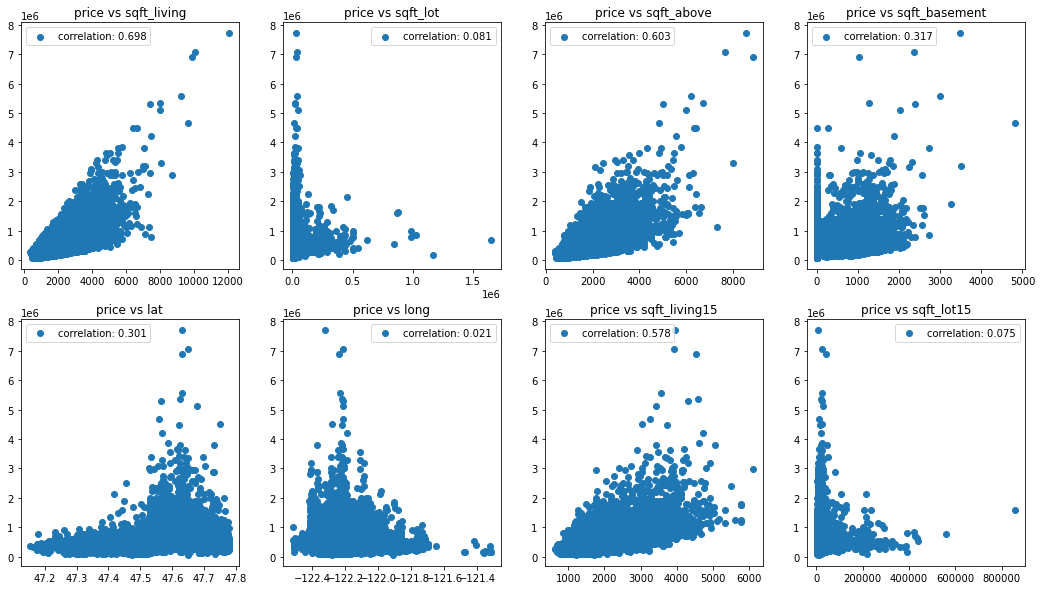

In [ ]:
# Now we can plot a matrix of the continuous variables against the target variable
# The graph gives us a good idea of the distributions between each variable and the target variable.

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (18,10))
for column, ax in zip(continuous_X.columns, axes.flatten()):
    
    # We'll also check the correlations of price against each variable
    corr = round(pd.concat([continuous_X[column], y_train], axis=1).corr().iloc[0,1], 3)
    ax.scatter(continuous_X[column], y_train, label = f'correlation: {corr}')
    ax.set_title(f'price vs {column}')
    ax.legend()

/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


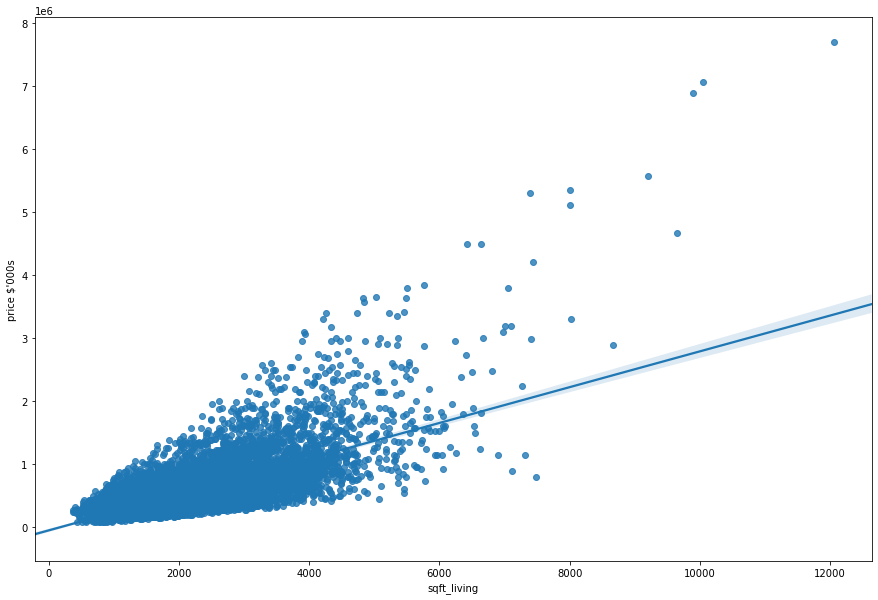

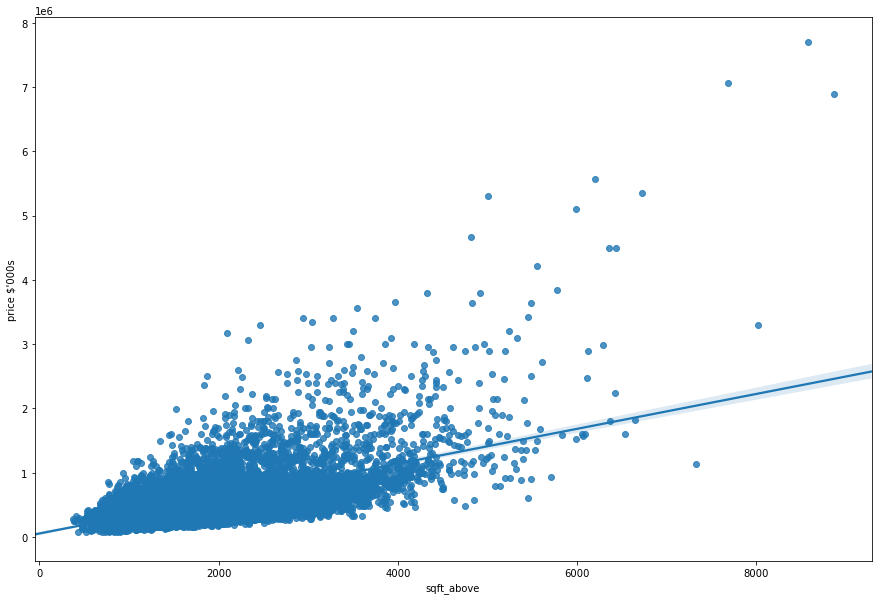

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.regplot(continuous_X['sqft_living'], y_train, truncate=False)
ax.set_ylabel(f'price $\'000s');
fig.savefig('graphs\price_sqft_living_scatter');

fig, ax = plt.subplots(figsize=(15,10))

sns.regplot(continuous_X['sqft_above'], y_train, truncate=False)
ax.set_ylabel(f'price $\'000s');
# fig.savefig('graphs\price_sqft_above_scatter');


Clearly sqft_living is the best correlated and longitude is the worst. <br>
In addition, lot15 is very uncorrelated with price.

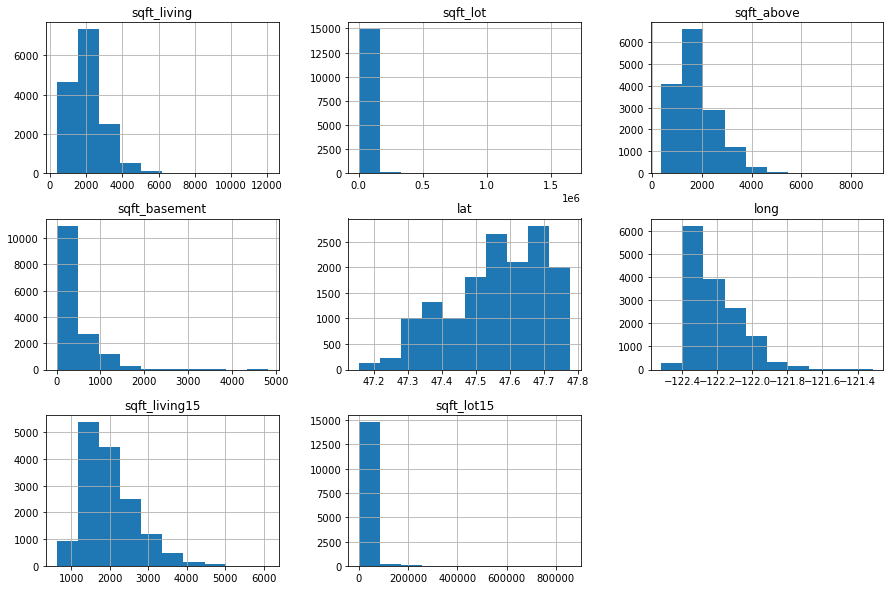

In [ ]:
# We'll also take a look at the distributions of each continuous variable
continuous_X.hist(figsize=(15,10));

We can immediately see skewed distributions in all cases besides sqft_lot15 and sqft_lot <br>
To normalise these, we can take the log of their values <br>
But we should be mindful. long has negetaive values so should not be used <br>
Sqft_basement has many 0 values so cannot be used. <br>
We will also run this code later on once we've removed all 0 values in all columns <br>


In [ ]:
continuous_X

sqft_living  sqft_lot  sqft_above  sqft_basement      lat     long  \
8093           970      9750         970            0.0  47.5073 -122.372   
13884          940      7980         940            0.0  47.5107 -122.345   
406           1290      1213        1290            0.0  47.6609 -122.344   
21317         5640     35006        4900          740.0  47.5491 -122.104   
7766          1230      7500        1230            0.0  47.4202 -122.331   
...            ...       ...         ...            ...      ...      ...   
10955         2420      7548        1370         1050.0  47.3112 -122.376   
17289         1060      5750        1060            0.0  47.5532 -122.372   
5192          1540     13002        1200            0.0  47.6231 -122.044   
12172         2420     49928        1860          560.0  47.4630 -122.008   
235           3760     28040        3760            0.0  47.6489 -122.183   

       sqft_living15  sqft_lot15  
8093            1850        9000  
13884           1050        7980  
406             1290        3235  
21317           4920       35033  
7766            1260        7800  
...              ...         ...  
10955           2150        8000  
17289           1060        5750  
5192            1620       10098  
12172           2620       37301  
235             3430       35096  

[15117 rows x 8 columns]

We see that there are only 2 sets of highly correlated variables.


### Feature engineering

In [ ]:
# Interestingly, we have both longitude and latitude so this opens room for creativity

# We'll create this function to help us calculate the distance between 2 points

def get_distance(point1, point2):
    R = 6370
    lat1 = radians(point1[0])  #insert value
    lon1 = radians(point1[1])
    lat2 = radians(point2[0])
    lon2 = radians(point2[1])

    dlon = lon2 - lon1
    dlat = lat2- lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance

# We will have to points of interest are the Centre of Seattle: (47.60457618602064, -122.32993003068658),
# and the centre of Redmond: (47.679328831807894, -122.13055895937767)
# For each record, we will calculate the distance from those points of interests and place them in a new column

continuous_X['lat_long'] = list(zip(continuous_X['lat'], continuous_X['long']))
continuous_X['Seattle_dist_km'] = continuous_X['lat_long'].apply(lambda x: get_distance(x, (47.60457618602064, -122.32993003068658)))
continuous_X['Redmond_dist_km'] = continuous_X['lat_long'].apply(lambda x: get_distance(x, (47.679328831807894, -122.13055895937767)))

# Finally we'll add the two together and form a new column
continuous_X['Redmond_Seattle_total_dist'] = continuous_X['Seattle_dist_km'] + continuous_X['Redmond_dist_km']

# The lat long column was temporary and only needed for the calculation. As it is a tuple, it is incompatible with sklearn
# As such we shall drop it

continuous_X.drop(columns=['lat_long'], inplace=True)

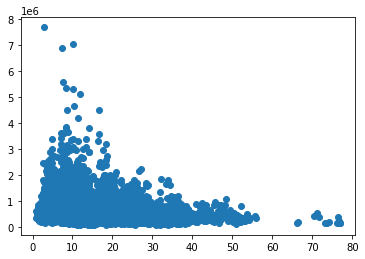

In [ ]:
# Now we'll plot a graph of price against Seattle dist and Redmond dist
plt.scatter(continuous_X['Seattle_dist_km'], y_train);

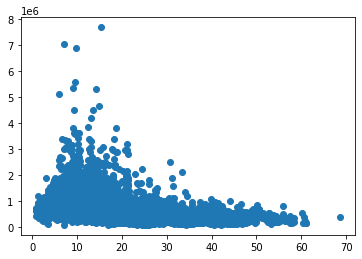

In [ ]:
plt.scatter(continuous_X['Redmond_dist_km'], y_train);

In [ ]:
# We can also include another feature: "average room size"
continuous_X['average_room_size'] = continuous_X['sqft_living'] / (cat_df['bathrooms'] + cat_df['bedrooms'])

# Another useful metric could be the Floor Area Ratio
continuous_X['floor_area_ratio'] = continuous_X['sqft_living'] / continuous_X['sqft_lot']


**We'll now draw our attention to the categorical variables**

In [ ]:
cat_df

date  bedrooms  bathrooms  floors  waterfront  view  condition  \
8093    7/10/2014         2       2.00     1.0           0     0          4   
13884  11/14/2014         3       1.00     1.0           0     0          2   
406      8/6/2014         3       2.00     3.0           0     0          2   
21317    5/8/2015         4       3.25     2.0           0     2          2   
7766    10/7/2014         3       1.50     1.0           0     0          2   
...           ...       ...        ...     ...         ...   ...        ...   
10955   9/17/2014         3       2.25     1.0           0     0          3   
17289    1/5/2015         3       1.50     1.0           0     0          1   
5192     8/1/2014         3       1.75     1.0           0     0          1   
12172   5/21/2014         3       2.50     2.0           0     0          2   
235     6/10/2014         5       4.00     2.0           0     0          2   

               grade  yr_built  yr_renovated  zipcode  
8093   6 Low Average      1940           0.0    98146  
13884  6 Low Average      1961           0.0    98146  
406           8 Good      2001           0.0    98103  
21317   11 Excellent      2015           0.0    98006  
7766       7 Average      1962           0.0    98198  
...              ...       ...           ...      ...  
10955         8 Good      1967           0.0    98023  
17289      7 Average      1981           0.0    98126  
5192          8 Good      1984           0.0    98074  
12172         8 Good      1985           0.0    98027  
235     10 Very Good      1983           0.0    98033  

[15117 rows x 11 columns]

From a quick glance, there a few things to clean up. <br>
We can strip the string values from the grades to get only numerical values. <br>
For date, we can turn the values into years. From there, we can calculate **year sold - year built** <br>
There also appears to be a house with 33 bedrooms which seems very unlikely.

In [ ]:
# There appears to be a house with 33 bedrooms. When we inspect it we see that this is probably due to a typo.
# Keeping its price in mind, we can assume that the entry was meant to be a "3"
cat_df.sort_values(by='bedrooms', ascending=False)

date  bedrooms  bathrooms  floors  waterfront  view  condition  \
15856   6/25/2014        33       1.75     1.0           0     0          4   
8748    8/21/2014        11       3.00     2.0           0     0          2   
4231     1/6/2015         9       3.00     2.0           0     0          2   
16830   3/17/2015         9       4.00     2.5           0     0          2   
4092     5/7/2014         9       4.50     2.5           0     0          2   
...           ...       ...        ...     ...         ...   ...        ...   
12197  11/25/2014         1       2.00     1.0           0     0          3   
11488   3/31/2015         1       1.00     1.0           0     0          3   
5577     9/8/2014         1       2.25     1.5           0     0          2   
16938    6/4/2014         1       1.00     1.0           0     0          3   
7612    8/25/2014         1       1.00     1.5           0     0          2   

               grade  yr_built  yr_renovated  zipcode  
15856      7 Average      1947           0.0    98103  
8748       7 Average      1918        1999.0    98106  
4231       7 Average      1908           0.0    98102  
16830   11 Excellent      1915           0.0    98105  
4092       7 Average      1938           0.0    98103  
...              ...       ...           ...      ...  
12197      7 Average      1962           0.0    98001  
11488          4 Low      1949           0.0    98136  
5577       7 Average      1927        1983.0    98003  
16938         5 Fair      1967           0.0    98042  
7612   6 Low Average      1929           0.0    98115  

[15117 rows x 11 columns]

In [ ]:
# We'll simply correct this error and replace the value with a 3.
cat_df['bedrooms'] = cat_df['bedrooms'].apply(lambda x: 3 if x == 33 else x)

<ipython-input-27-d10bbacc0fcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['bedrooms'] = cat_df['bedrooms'].apply(lambda x: 3 if x == 33 else x)


<ipython-input-28-f9219ae94a15>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['grade'] = cat_df['grade'].apply(lambda x: get_digit(x))


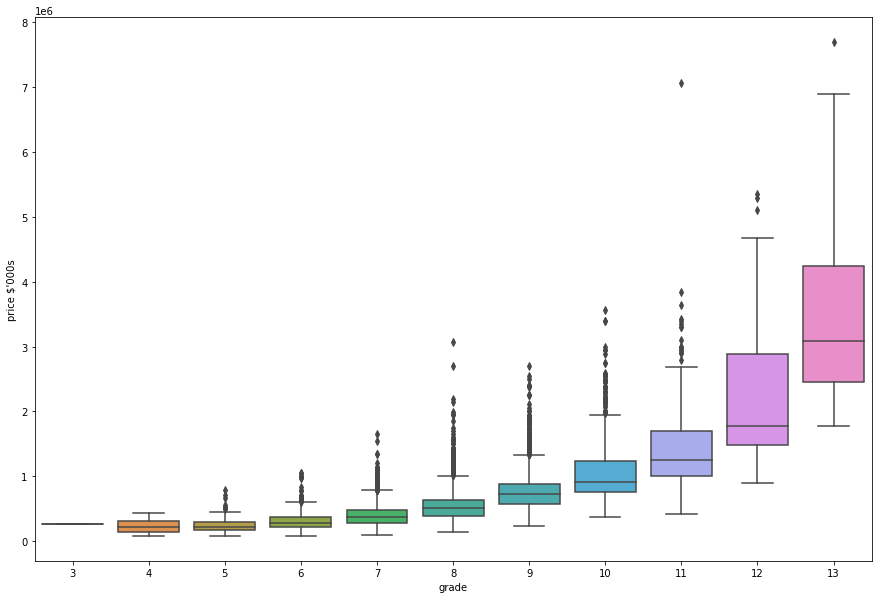

In [ ]:
# We'll strip the letters from grade values using a simple function
def get_digit(string):
    for s in string.split():
        if s.isdigit():
            return int(s)

# And then apply this to the grade column.
cat_df['grade'] = cat_df['grade'].apply(lambda x: get_digit(x))

#Once we plot the graph again, we can see a clear correlation between price and grade
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(x=cat_df['grade'], y=y_train)
ax.set_ylabel(f'price $\'000s')
#fig.savefig('graphs\price_grade_box_plot');

In [ ]:
# For the date sold, we shall turn that into years
cat_df['date'] = cat_df['date'].apply(lambda x: int(x[-4:]))

# From there, we shall make a new column called year sell_build_year_dff
# This is now arguably a continuous variable so can be placed in the continuous_X dataframe
continuous_X['sell_build_year_dff'] = abs(cat_df['date'] - cat_df['yr_built'])

<ipython-input-29-72e703a2defe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['date'] = cat_df['date'].apply(lambda x: int(x[-4:]))


<ipython-input-30-3296e2e2c176>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['bathroom_rate'] = cat_df['bathrooms'].apply(lambda x: bathroom_rank(x))


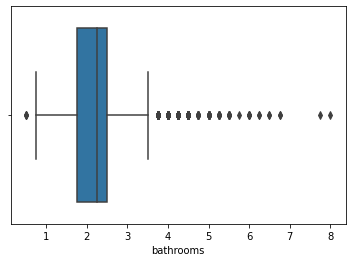

In [ ]:
# If we look at the distributions of values in the bathrooms column, we can see that there are only a few bathrooms
# that exceed the IQR range

sns.boxplot(x=cat_df['bathrooms']);

# When modelling, the model will be greatly affected by these values, thus a way to resolve this is by grouping them

# We shall state houses with less than 2 bathrooms are "1", 2-4 are 2-3.5 are "2" and greater than 3.5 are "3"
# This will then be placed in a new column called "bathroom_rating"

def bathroom_rank(value):
    if value <= 2.00:
        return 1
    elif value > 2.00 and value <= 3.50:
        return 2
    else:
        return 3
    
cat_df['bathroom_rate'] = cat_df['bathrooms'].apply(lambda x: bathroom_rank(x))

# We shall still use the bathrooms to feature engineer a new variable.
continuous_X['bathroom_bedroom_ratio'] = cat_df['bathrooms'] / cat_df['bedrooms']


Let's have another look at our continuous_X distributions.

# Webscraping
We can also take this time to add a few new features.

In [ ]:
import json
import requests
from bs4 import BeautifulSoup

In [ ]:
zipcode_df = pd.DataFrame(columns=['zipcode', 'population', 'land_area', 'pop_density', 'water_area', 'income', 'nearby_schools'])

# We'll create a fucntion to webscrape all the unique zipcode values
def scrape_data(zipcode):
    # Setting up the web scraper
    headers = requests.utils.default_headers()
    headers.update({
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
    })

    url = f'https://www.unitedstateszipcodes.org/{zipcode}/'

    res = requests.get(url, headers=headers)
    soup = BeautifulSoup(res.content, 'html.parser')
    
    # We'll firstly retrieve the populations
    population_group = json.loads(soup.find_all('script')[11].string.strip().replace('\t', '').replace('\n', '')[154:-1433])
    population = population_group['values'][-5]['y']
    
    # We'll then retrieve the area of the zipcode in square miles
    land_area = float(soup.find_all('td', class_='text-right')[4].get_text())
    
    # We can then find population density per year
    pop_density = population / land_area
    
    # The water area
    water_area = float(soup.find_all('td', class_='text-right')[5].get_text())
    
    # Average income per zipcode
    # We need to make special adjustments for 1 zipcode
    if zipcode != 98039:
        income_group = json.loads(soup.find_all('script')[-16].string.strip().replace('\t', '').replace('\n', '')[154:-1488])
        income = income_group['values'][-5]['y']
    elif zipcode == 98039:
        income_group = json.loads(soup.find_all('script')[-16].string.strip().replace('\t', '').replace('\n', '')[154:-1555])
        income = income_group['values'][-5]['y']

    
    # Number of nearby schools in the zipcode
    nearby_schools = int(len(soup.find_all('div', class_='nearby-school')))
    
    # Then add them to the zipcode dataframe
    zipcode_dictionary = {'zipcode': zipcode,'population': population, 'land_area': land_area, 'pop_density': pop_density, 'water_area': water_area, 'income': income, 'nearby_schools': nearby_schools}
    
    return zipcode_dictionary


In [ ]:
unique_zipcodes = list(pd.DataFrame(cat_df['zipcode'].value_counts()).reset_index()['index'])

In [ ]:
# We used this on the first run, but we no longer need to scrape everytime the notebook runs

# for zipcode in unique_zipcodes:
    # zipcode_df = zipcode_df.append(scrape_data(zipcode), ignore_index=True)

In [ ]:
#zipcode_df.to_csv('data/scraped_data.csv')
zipcode_df = pd.read_csv('data/scraped_data.csv').drop('Unnamed: 0', axis=1)

In [ ]:
# Then add the continuous and categorical variables to our already existing dataframe
cat_df = cat_df.reset_index().merge(zipcode_df, how='left', left_on = 'zipcode', right_on = 'zipcode').set_index('index')


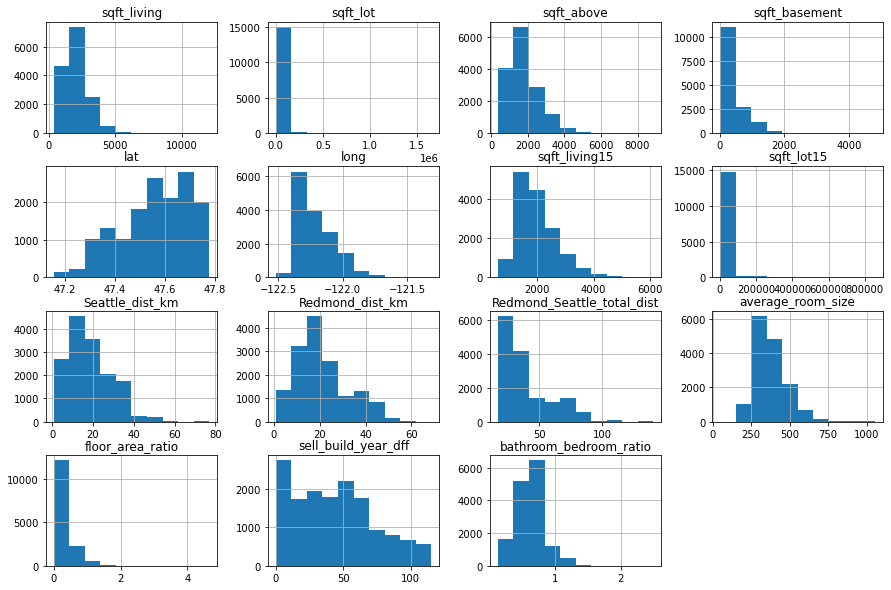

In [ ]:
continuous_X.hist(figsize=(15,10));

We can again see skewed distributions. <br>
We also cannot include sell_build_year_diff as it includes a 0 value.


In [ ]:
# Now we can return back to our log transformations
for column in list(continuous_X.drop(['sqft_lot', 'sqft_lot15', 'long', 'sqft_basement', 'sell_build_year_dff'], axis=1).columns):
    continuous_X[f'{column}_log'] = np.log(continuous_X[column])

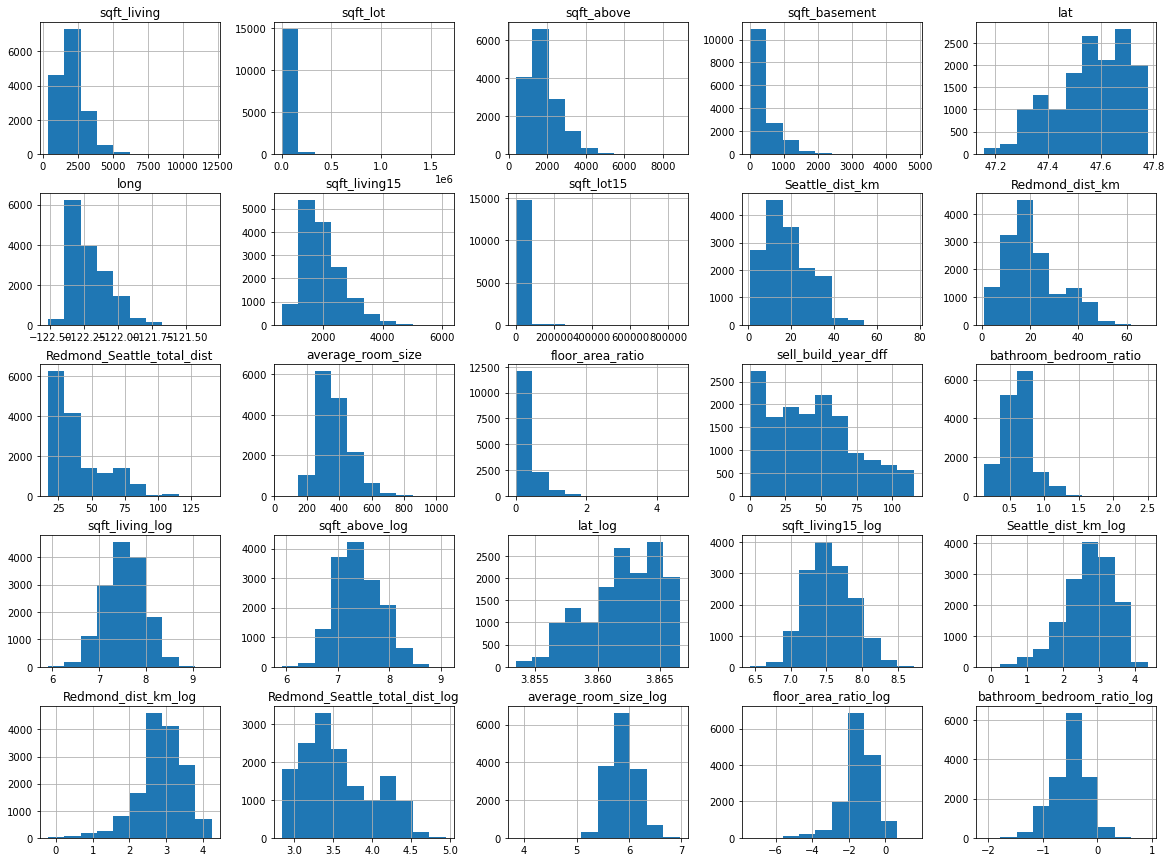

In [ ]:
# When creating our visuals again, we see some log transformations did better than others.
continuous_X.hist(figsize=(20,15));

In [ ]:
# In any case, we should make dummy variables of the majority of our categorical variables.
#dummies = pd.get_dummies(data=cat_df, columns=['waterfront', 'view', 'condition', 'grade', 'bedrooms', 'zipcode', 'bathrooms', 'floors', 'bathroom_rate'], drop_first = True)


In [ ]:
# And then we shall concat the continuous features with the categorical features and this shall be our X_train
#X_train = pd.concat([continuous_X, dummies, cat_df.drop(columns=['waterfront', 'view', 'condition', 'grade', 'bedrooms', 'zipcode', 'bathrooms', 'floors', 'bathroom_rate'])], axis=1)
X_train = pd.concat([continuous_X, cat_df], axis=1)


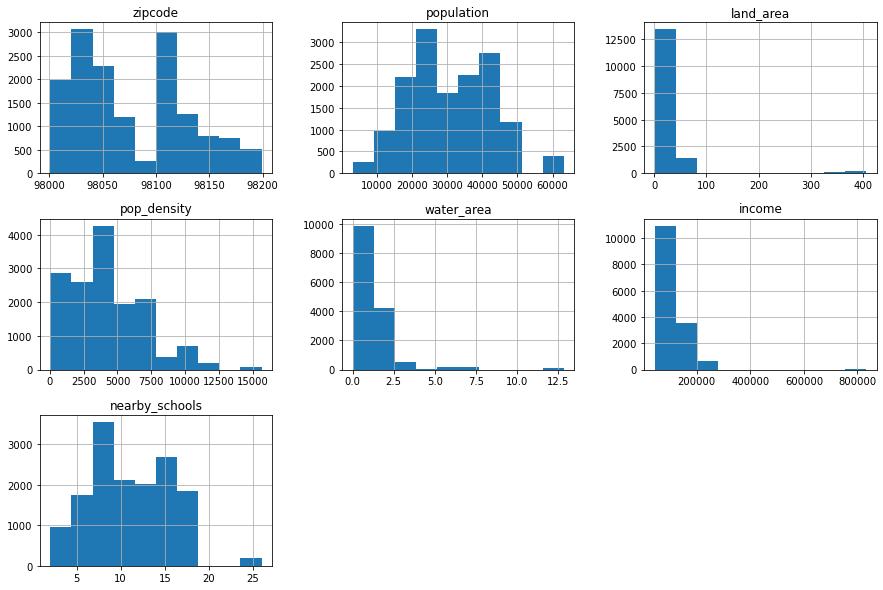

In [ ]:
# We'll also examine the distributions of our new features
X_train[list(zipcode_df.columns)].hist(figsize=(15,10));

In [ ]:
# We'll drop the date column to avoid data leakage
X_train.drop(columns=['date'], inplace=True)

## X_test alterations

In [ ]:
# This is a function that summarizes all of our transformations
def X_test_alter(X_test):
    cat_X = ['date','bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']
    cat_df = X_test[cat_X]
    continuous_X = X_test.drop(cat_X, axis=1)
    
    continuous_X['sqft_basement'] = continuous_X['sqft_basement'].apply(lambda x: 0 if x == '?' else x)
    continuous_X['sqft_basement'] = continuous_X['sqft_basement'].astype(float)
    
    # We fill na values with the same values used from the X_train dataframe
    cat_df['waterfront'].fillna(waterfront_mode, inplace = True)
    cat_df['view'].fillna(view_mode, inplace = True)
    cat_df['yr_renovated'].fillna(yr_renovated_mode, inplace = True)
    
    # We then replace these string values with numerical values
    view_values = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
    condition_values = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
    waterfront_values = ['NO', 'YES']

    values_dict = {'view': view_values, 'condition': condition_values, 'waterfront': waterfront_values}

    for column_name, values_list in values_dict.items():
        for num, value in enumerate(values_list):
            cat_df.loc[cat_df[column_name] == value, column_name] = int(num)
        cat_df[column_name] = cat_df[column_name].astype(int)
        
    # We then focus on feature engineering    
    # Here, we calculate distances using latitude and longitude
    
    continuous_X['lat_long'] = list(zip(continuous_X['lat'], continuous_X['long']))
    continuous_X['Seattle_dist_km'] = continuous_X['lat_long'].apply(lambda x: get_distance(x, (47.60457618602064, -122.32993003068658)))
    continuous_X['Redmond_dist_km'] = continuous_X['lat_long'].apply(lambda x: get_distance(x, (47.679328831807894, -122.13055895937767)))

    # Finally we'll add the two together and form a new column
    continuous_X['Redmond_Seattle_total_dist'] = continuous_X['Seattle_dist_km'] + continuous_X['Redmond_dist_km']
    
    # Ant then drop the temporary column
    continuous_X.drop(columns=['lat_long'], inplace=True)
    
    # The features regarding sqft_living
    continuous_X['average_room_size'] = continuous_X['sqft_living'] / (cat_df['bathrooms'] + cat_df['bedrooms'])
    continuous_X['floor_area_ratio'] = continuous_X['sqft_living'] / continuous_X['sqft_lot']
    
    # Convert the grade string values into numerical values
    cat_df['grade'] = cat_df['grade'].apply(lambda x: get_digit(x))
    
    # Computations for sell_build_year_dff
    cat_df['date'] = cat_df['date'].apply(lambda x: int(x[-4:]))
    continuous_X['sell_build_year_dff'] = abs(cat_df['date'] - cat_df['yr_built'])
    
    # Grouping bathrooms and calculating ratios
    cat_df['bathroom_rate'] = cat_df['bathrooms'].apply(lambda x: bathroom_rank(x))
    continuous_X['bathroom_bedroom_ratio'] = cat_df['bathrooms'] / cat_df['bedrooms']
    
    # We'll drop the date column to avoid data leakage
    cat_df.drop(columns=['date'], inplace=True)
    
    # Log transformations
    for column in list(continuous_X.drop(['sqft_lot', 'sqft_lot15', 'long', 'sqft_basement', 'sell_build_year_dff'], axis=1).columns):
        continuous_X[f'{column}_log'] = np.log(continuous_X[column])
    
    # Creating our dummy variables
    # dummies = pd.get_dummies(data=cat_df, columns=['waterfront', 'view', 'condition', 'grade', 'bedrooms', 'zipcode', 'bathrooms', 'floors', 'bathroom_rate'], drop_first = True)

    # We also include our scraped data
    zipcode_df = pd.DataFrame(columns=['zipcode', 'population', 'land_area', 'pop_density', 'water_area', 'income', 'nearby_schools'])
    
    unique_zipcodes = list(pd.DataFrame(cat_df['zipcode'].value_counts()).reset_index()['index'])
    
    for zipcode in unique_zipcodes:
        zipcode_df = zipcode_df.append(scrape_data(zipcode), ignore_index=True)
    
    cat_df = cat_df.reset_index().merge(zipcode_df, how='left', left_on = 'zipcode', right_on = 'zipcode').set_index('index')
    
    # Finally concatinating all features
    # X_test_alt = pd.concat([continuous_X, dummies, cat_df.drop(columns=['waterfront', 'view', 'condition', 'grade', 'bedrooms', 'zipcode', 'bathrooms', 'floors', 'bathroom_rate'])], axis=1)
    X_test_alt = pd.concat([continuous_X, cat_df], axis = 1)

    return X_test_alt


Now that we have completed the feature engineering on **X_train**, we must do the same transformations to **X_test** so they may be compared against each other.

In [ ]:
# We comment this out to not scrape again
# X_test = X_test_alter(X_test)

/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-44-78989b54602b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [ ]:
X_test = pd.read_csv('data/X_test.csv').drop('Unnamed: 0', axis=1)
#X_test.to_csv('data/X_test.csv')

# Model Building

## Model 1 - { Baseline Model }
This initial model will be extremely basic. It will simply take the price data and the continuous variables **without** the columns we features we engineered. <br>
We will be validating our predictions using the k fold validation method. <br> <br>
**Summary:** <br>
> *Train R squared* = **0.584** <br>
> *Test R squared* = **0.579** <br>
<br>
> *RMSE_test* = **0.579** <br>

In [ ]:
from sklearn.linear_model import LinearRegression
model1_linreg = LinearRegression()

model1_scores = cross_validate(
                        model1_linreg, X_train[list(continuous_X.columns)].iloc[:, 0:8], y_train, cv=20,
                        scoring = ['neg_mean_squared_error', 'r2'],
                        return_train_score=True
)

In [ ]:
model1_train_r2 = np.mean(model1_scores['train_r2'])
model1_test_r2 = np.mean(model1_scores['test_r2'])
model1_test_RMSE = np.mean(abs((model1_scores['test_neg_mean_squared_error'])))**0.5
model1_train_RMSE = np.mean(abs((model1_scores['train_neg_mean_squared_error'])))**0.5

print(f'Train R squared: {round(model1_train_r2, 3)} | Test R squared: {round(model1_test_r2, 3)}')
print(f'Train RMSE: {round(model1_train_RMSE, 3)} | Test RMSE: {round(model1_test_RMSE, 3)}')

Train R squared: 0.584 | Test R squared: 0.579
Train RMSE: 240325.764 | Test RMSE: 240730.88


In [ ]:
model1_linreg.fit(X_train[list(continuous_X.columns)].iloc[:, 0:8], y_train)

LinearRegression()

**Analysis** <br>
An R squared value of 0.58 is a good position to start. <br>
We also see a small difference between the test and training sets which suggests no under or overfitting.

## Model 2

Now we'll incorporate all of the continuous variables that were used.

In [ ]:
from sklearn.linear_model import LinearRegression
model2_linreg = LinearRegression()

model2_scores = cross_validate(
                        model2_linreg, X_train[list(continuous_X.columns)], y_train, cv=20,
                        scoring = ['neg_mean_squared_error', 'r2'],
                        return_train_score=True
)

In [ ]:
model2_train_r2 = np.mean(model2_scores['train_r2'])
model2_test_r2 = np.mean(model2_scores['test_r2'])
model2_test_RMSE = np.mean(abs((model2_scores['test_neg_mean_squared_error'])))**0.5
model2_train_RMSE = np.mean(abs((model2_scores['train_neg_mean_squared_error'])))**0.5

print(f'Train R squared: {round(model2_train_r2, 3)} | Test R squared: {round(model2_test_r2, 3)}')
print(f'Train RMSE: {round(model2_train_RMSE, 3)} | Test RMSE: {round(model2_test_RMSE, 3)}')

Train R squared: 0.728 | Test R squared: 0.721
Train RMSE: 194405.757 | Test RMSE: 195497.479


In [ ]:
model2_linreg.fit(X_train[list(continuous_X.columns)], y_train)

LinearRegression()

## Model 3

We'll now include both our continuous and categorical features which have **NOT** been dummied.

In [ ]:
from sklearn.linear_model import LinearRegression
model3_linreg = LinearRegression()

model3_scores = cross_validate(
                        model3_linreg, X_train, y_train, cv=20,
                        scoring = ['neg_mean_squared_error', 'r2'],
                        return_train_score=True
)

In [ ]:
model3_train_r2 = np.mean(model3_scores['train_r2'])
model3_test_r2 = np.mean(model3_scores['test_r2'])
model3_test_RMSE = np.mean(abs((model3_scores['test_neg_mean_squared_error'])))**0.5
model3_train_RMSE = np.mean(abs((model3_scores['train_neg_mean_squared_error'])))**0.5

print(f'Train R squared: {round(model3_train_r2, 3)} | Test R squared: {round(model3_test_r2, 3)}')
print(f'Train RMSE: {round(model3_train_RMSE, 3)} | Test RMSE: {round(model3_test_RMSE, 3)}')

Train R squared: 0.82 | Test R squared: 0.813
Train RMSE: 158282.72 | Test RMSE: 159826.708


In [ ]:
model3_linreg.fit(X_train, y_train)

LinearRegression()

So far, model 3 seems to be our best model.

## Testing against X_test

Now that we have our best model, it is time to test it against the unseen X_test and y_test.

In [ ]:
# Model 1
model1_r2 = model1_linreg.score(X_test[list(continuous_X.columns)].iloc[:, 0:8], y_test)
mode11_y_hat = model1_linreg.predict(X_test[list(continuous_X.columns)].iloc[:, 0:8])
model1_rmse = np.sqrt(mean_squared_error(y_test, mode11_y_hat))

print(f'Model_1 R squared: {round(model1_r2, 3)} | Model_1 RMSE: ${round(model1_rmse, 3)} million')

Model_1 R squared: 0.61 | Model_1 RMSE: $221510.001 million


In [ ]:
# Model 2
model2_r2 = model2_linreg.score(X_test[list(continuous_X.columns)], y_test)
mode12_y_hat = model2_linreg.predict(X_test[list(continuous_X.columns)])
model2_rmse = np.sqrt(mean_squared_error(y_test, mode12_y_hat))

print(f'Model_2 R squared: {round(model2_r2, 3)} | Model_2 RMSE: ${round(model2_rmse, 3)} million')

Model_2 R squared: 0.728 | Model_2 RMSE: $184940.657 million


In [ ]:
# Model 3
model3_r2 = model3_linreg.score(X_test, y_test)
mode13_y_hat = model3_linreg.predict(X_test)
model3_rmse = np.sqrt(mean_squared_error(y_test, mode13_y_hat))

print(f'Model_3 R squared: {round(model3_r2, 3)} | Model_3 RMSE: ${round(model3_rmse, 3)} million')

Model_3 R squared: 0.824 | Model_3 RMSE: $148562.82 million


In [ ]:
# Clearly, model 3 is our best model
best_model = model3_linreg

/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


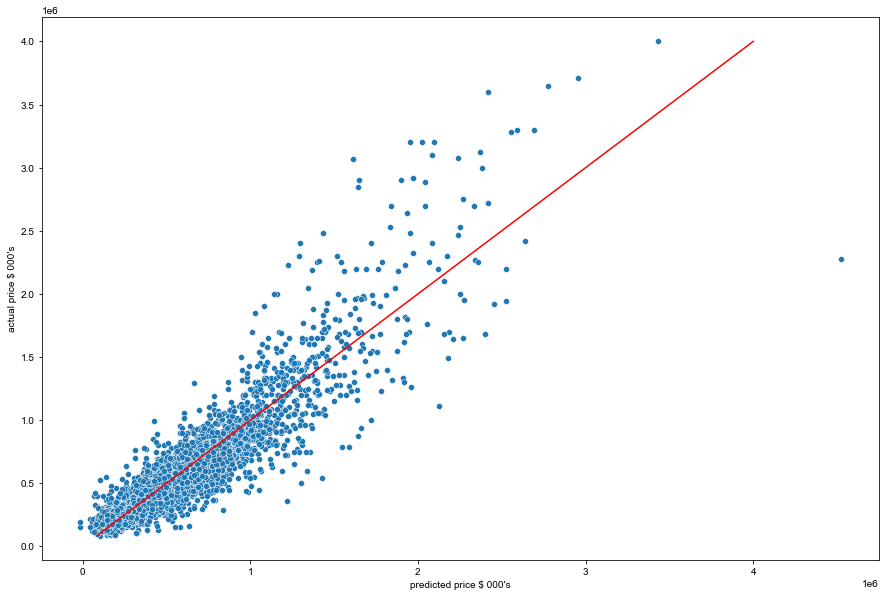

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(best_model.predict(X_test), y_test)
sns.lineplot(y_test, y_test, color='red')
ax.set_ylabel('actual price $ 000\'s')
ax.set_xlabel('predicted price $ 000\'s')

sns.set_theme(style='darkgrid');
#fig.savefig('final_model_graph.png')

<br>

<br>

<br>

## Inferential Analysis

With inferential analysis, we now care about linearity assumptions and multicolinearity. <br>
We'll first make a correlation matrix to get a sense of multicolinearity.

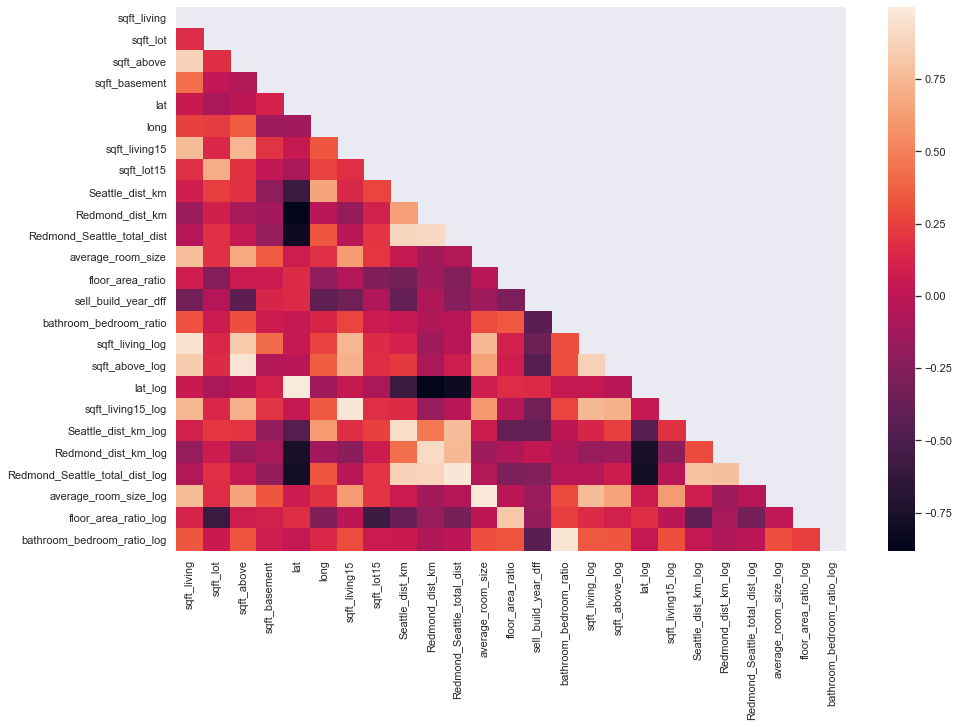

In [ ]:
# We'll also create a heatmap to see which variables are highly correlated with each other.
# This is to avoid multicolinearity when making a model
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(continuous_X.corr(), mask = np.triu(continuous_X.corr()));


We can filter out all variables that have a high correlation.

In [ ]:
# First we'll create a dataframe based on the absolute correalation values
corr_df = continuous_X.corr().abs().stack().reset_index()

# Level_0 and level_1 refer to the variable names
# We then create a new column that is a tuple of the variable names
corr_df['pairs'] = list(zip(corr_df['level_0'], corr_df['level_1']))

# We'll make the pairs column the index
corr_df.set_index(['pairs'], inplace = True)

# We can then drop the level_0 and level_1 columns
corr_df.drop(columns = ['level_0', 'level_1'], inplace = True)

# We can then rename the '0' column to 'correlation'
corr_df.columns = ['correlation']

# From our heat map we can see that the only perfectly correlation variables are 2 of the same variables
# So we can drop rows that have a correlation of 1
corr_df = corr_df[corr_df['correlation'] != 1]

# Finally, we sort these values by correlation in descending order
corr_df.sort_values(by=['correlation'], ascending = False, inplace = True)

# We also need to get rid of duplicate values e.g. A and B is the same as B and A
corr_df.drop_duplicates(inplace = True)

# Now we can isolate those which are highly correlated
corr_df[corr_df['correlation'] >=0.75]

correlation
pairs                                                          
(lat_log, lat)                                         0.999999
(average_room_size_log, average_room_size)             0.982922
(sqft_living15, sqft_living15_log)                     0.977013
(Redmond_Seattle_total_dist, Redmond_Seattle_to...     0.973733
(bathroom_bedroom_ratio, bathroom_bedroom_ratio...     0.968955
(sqft_above_log, sqft_above)                           0.962775
(sqft_living, sqft_living_log)                         0.955207
(Seattle_dist_km_log, Seattle_dist_km)                 0.928138
(Redmond_dist_km_log, Redmond_dist_km)                 0.918388
(Redmond_Seattle_total_dist, Redmond_dist_km)          0.908812
(Redmond_Seattle_total_dist, Seattle_dist_km)          0.893960
(Redmond_Seattle_total_dist_log, Redmond_dist_km)      0.882674
(lat_log, Redmond_dist_km)                             0.880976
(lat, Redmond_dist_km)                                 0.880580
(sqft_living, sqft_above)                              0.877115
(Seattle_dist_km, Redmond_Seattle_total_dist_log)      0.872912
(sqft_living_log, sqft_above_log)                      0.865443
(sqft_above_log, sqft_living)                          0.844392
(sqft_living_log, sqft_above)                          0.832857
(floor_area_ratio_log, floor_area_ratio)               0.822006
(Redmond_Seattle_total_dist, lat_log)                  0.820495
(Redmond_Seattle_total_dist, lat)                      0.819894
(Seattle_dist_km_log, Redmond_Seattle_total_dis...     0.800595
(Redmond_Seattle_total_dist_log, lat_log)              0.789720
(lat, Redmond_Seattle_total_dist_log)                  0.789238
(Redmond_Seattle_total_dist_log, Redmond_dist_k...     0.781227
(average_room_size, sqft_living)                       0.774777
(Seattle_dist_km_log, Redmond_Seattle_total_dist)      0.766302
(sqft_living_log, average_room_size_log)               0.761150
(sqft_living, average_room_size_log)                   0.760175
(sqft_living, sqft_living15)                           0.759246
(Redmond_dist_km_log, Redmond_Seattle_total_dist)      0.756826
(lat_log, Redmond_dist_km_log)                         0.756793
(lat, Redmond_dist_km_log)                             0.756664
(sqft_living_log, sqft_living15_log)                   0.750748

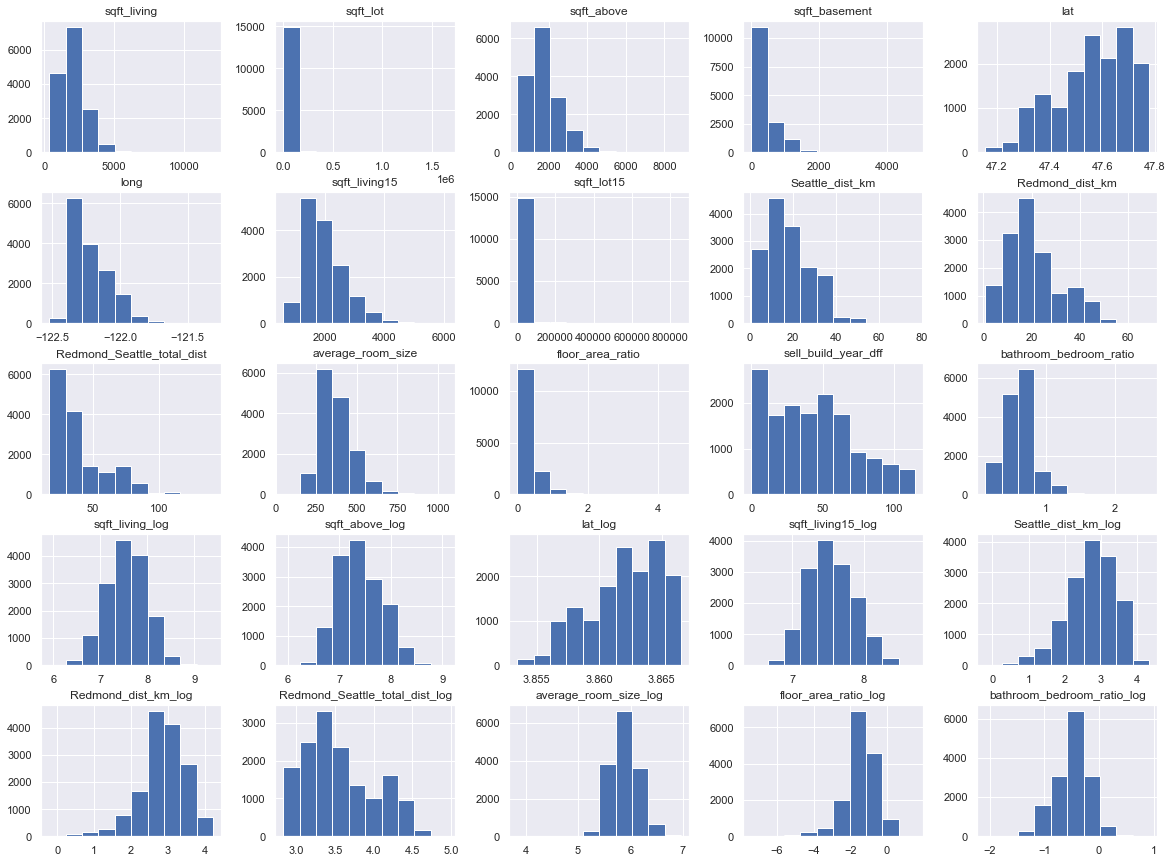

In [ ]:
# We'll plot the histograms again for reference
continuous_X.hist(figsize=(20,15));

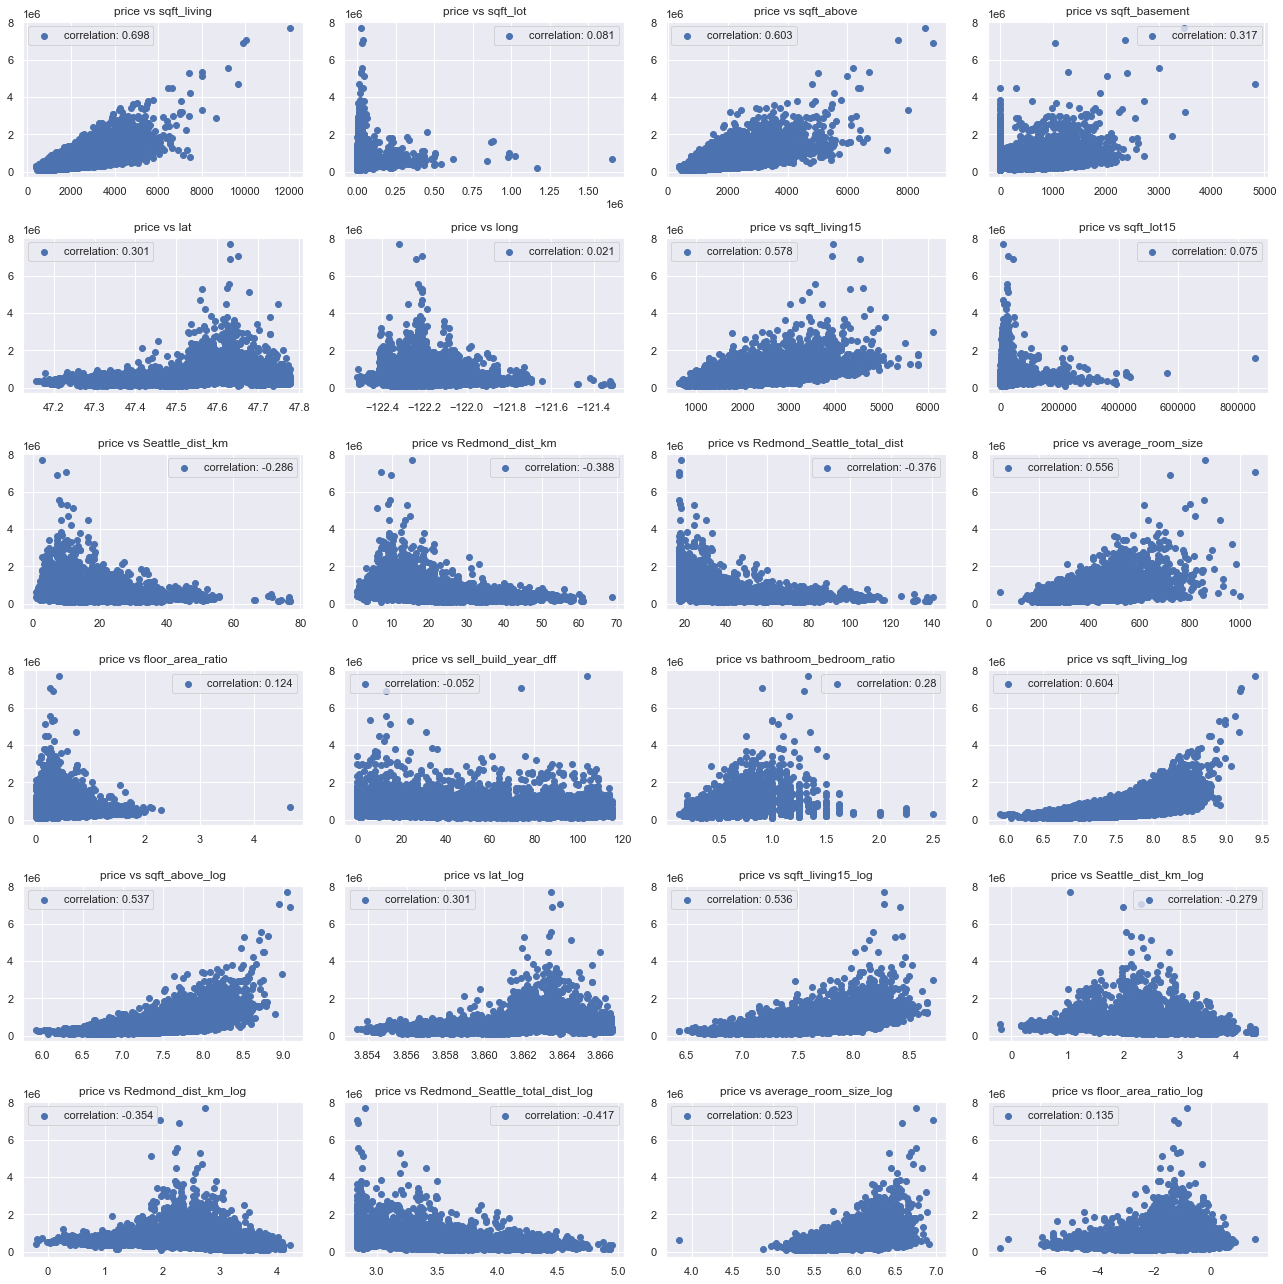

In [ ]:
# We shall also replot our scatterplots and calculate correlation
fig, axes = plt.subplots(nrows = 6, ncols = 4, figsize = (18,18))
for column, ax in zip(continuous_X.columns, axes.flatten()):
    
    # We'll also check the correlations of price against each variable
    corr = round(pd.concat([continuous_X[column], y_train], axis=1).corr().iloc[0,1], 3)
    ax.scatter(continuous_X[column], y_train, label = f'correlation: {corr}')
    ax.set_title(f'price vs {column}')
    ax.legend()
fig.tight_layout()

## Inferential Model 1
This will simply be a single linear regression.

In [ ]:
# We should take note to pick predictors which are most normally distributed.
# sqft_living would be our first choice but with the histogram, we see it is not normally distributed
# We can opt to take the logged version and also the logged version of price
# In addition, from the scatter plot, the logged sqft_living is closer to a polynomial graph so we should square 
# the values

# We can actually choose to square the sqft_living_log
model_1_inf = sm.OLS(np.log(y_train), sm.add_constant(X_train['sqft_living_log']**2)).fit()
model_1_inf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                 1.295e+04
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:39:14   Log-Likelihood:                -7078.2
No. Observations:               15117   AIC:                         1.416e+04
Df Residuals:                   15115   BIC:                         1.418e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.8588      0.028    349.364      0.000       9.803       9.914
sqft_living_log     0.0558      0.000    113.785      0.000       0.055       0.057
==============================================================================
Omnibus:                       82.308   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.554
Skew:                           0.136   Prob(JB):                     3.92e-17
Kurtosis:                       2.786   Cond. No.                         517.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that our model satisfies all linear assumuptions. Which yields us a low *r squared value* of **0.461**.

## Model 2
This time, we shall include other continuous variables. <br>
We will keep multicolinearity in mind and only select appropriate predictors.

In [ ]:
model_2_inf_predictors = X_train[['sqft_living_log', 'average_room_size_log', 'bathroom_bedroom_ratio_log', 'Redmond_Seattle_total_dist_log']]

model_2_inf = sm.OLS(np.log(y_train), sm.add_constant(model_2_inf_predictors)).fit()
model_2_inf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     9833.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:39:14   Log-Likelihood:                -2067.1
No. Observations:               15117   AIC:                             4144.
Df Residuals:                   15112   BIC:                             4182.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              8.8601      0.058    152.285      0.000       8.746       8.974
sqft_living_log                    0.6832      0.008     82.116      0.000       0.667       0.699
average_room_size_log              0.1990      0.013     14.944      0.000       0.173       0.225
bathroom_bedroom_ratio_log         0.1453      0.007     20.394      0.000       0.131       0.159
Redmond_Seattle_total_dist_log    -0.5811      0.005   -117.511      0.000      -0.591      -0.571
==============================================================================
Omnibus:                      317.155   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              555.570
Skew:                           0.174   Prob(JB):                    2.29e-121
Kurtosis:                       3.872   Cond. No.                         268.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_2_inf = LinearRegression()

model_2_inf_scores = cross_validate(
               model_2_inf, model_2_inf_predictors, y_train, cv=5, 
               scoring = ['neg_mean_squared_error', 'r2'],    
               return_train_score=True
)


In [ ]:
model_2_inf_train_r2 = np.mean(model_2_inf_scores['train_r2'])
model_2_inf_test_r2 = np.mean(model_2_inf_scores['test_r2'])
model_2_inf_test_RMSE = np.mean(abs((model_2_inf_scores['test_neg_mean_squared_error'])))**0.5
model_2_inf_train_RMSE = np.mean(abs((model_2_inf_scores['train_neg_mean_squared_error'])))**0.5

print(f'Train R squared: {round(model_2_inf_train_r2, 3)} | Test R squared: {round(model_2_inf_test_r2, 3)}')
print(f'Train RMSE: {round(model_2_inf_test_RMSE, 3)} | Test RMSE: {round(model_2_inf_train_RMSE, 3)}')

Train R squared: 0.536 | Test R squared: 0.538
Train RMSE: 254177.747 | Test RMSE: 253913.614


In [ ]:
model_2_inf.fit(X_train[['sqft_living_log', 'average_room_size_log', 'bathroom_bedroom_ratio_log', 'Redmond_Seattle_total_dist_log']], y_train)


LinearRegression()

In [ ]:
model_2_inf.score(X_test[['sqft_living_log', 'average_room_size_log', 'bathroom_bedroom_ratio_log', 'Redmond_Seattle_total_dist_log']], y_test)


0.569555225498428

In [ ]:
model_2_inf.coef_

array([ 416777.78997195,  172458.62770932,   80709.55829168,
       -323294.22212705])

In [ ]:
models_dict.update({'Continuous, plus engineered features\nNo Dummies': (.694, 196000), 'All features, No dummies \n Plus scraped data': (.82, 160000)})
models_dict

{'Naive simple': (0.49, 249000),
 'All continuous': (0.61, 222000),
 'All numeric': (0.637, 216000),
 'All original features': (0.694, 198000),
 'Added dummies': (0.659, 210000),
 'Engineered city-centers feature': (0.696, 198000),
 'More features engineered': (0.681, 202000),
 'Log transformations': (0.66, 209000),
 'Dropping columns': (0.66, 209000),
 'Continuous, plus engineered features\nNo Dummies': (0.694, 196000),
 'All features, No dummies': (0.771, 169000)}

### Illustrating our progress over time

We'll use our test score data to make a graph of our progress over time. We'll use a double-y-axis graph showing R^2 as a bar chart and RMSE as a line graph. 

In [ ]:
x_error = []
xticklabels = []
y = []

for model_name, model_metric in models_dict.items():
    xticklabels.append(model_name)
    y.append(model_metric[0])
    x_error.append(model_metric[1])

Text(0.5, 1.0, 'Model Effectiveness')

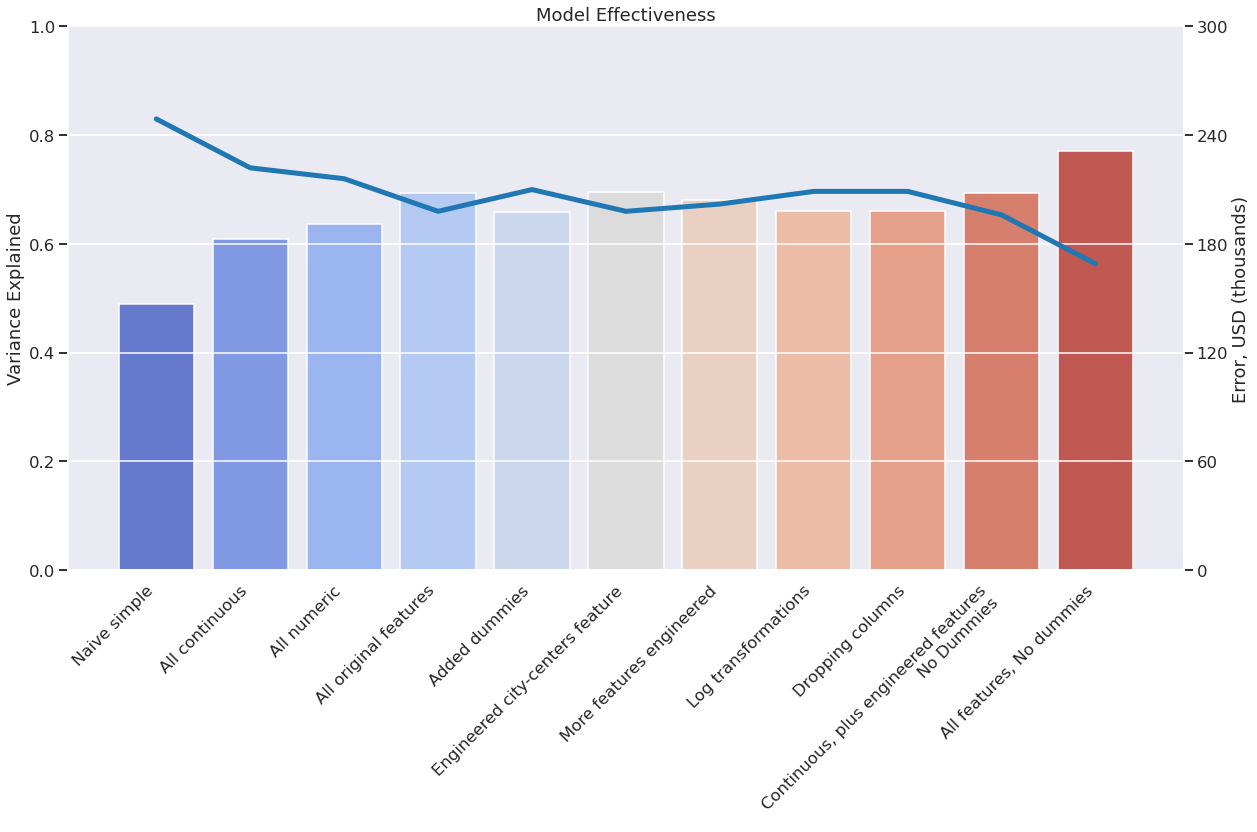

In [ ]:
sns.set_style('darkgrid')
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(x=xticklabels, y=y, palette="coolwarm")
ax.set(ylim=(0, 1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

ax2 = ax.twinx()
sns.lineplot(x=xticklabels, y=x_error, linewidth=5)
ax2.set(ylim=(0, 300000))
ax2.set_yticks(np.linspace(0,300000,num=6))
ax2.set_yticklabels(np.linspace(0,300,num=6,dtype=int))

ax.set_ylabel('Variance Explained')
ax2.set_ylabel('Error, USD (thousands)')
ax.set_title('Model Effectiveness');